In [1]:
## For this, we do not need specialisied environment, we will use numpy, scipy and matplotlib

import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate

In [2]:
#Universal constants

w = 0.4128

In [3]:
##let us define the functions to use. We will use a large 

def integrand(x, t, tb):
    return np.sin(x*t)/(1 + (x**2)*(tb**2))


def s(t,tk):
    tb = w*np.pi*tk
    I = integrate.quad(integrand, 0, np.inf, args = (t,tb))[0]
    return I

In [4]:
print(s(0,0.08))

0.0


In [5]:
# gamma_imp =    # depends on v_F somehow, have to find that relation
#tk = 3*gamma_imp/(w*(np.pi**2))

def tk_col(theta,theta_k):
    return 2*theta*np.cos(theta)*np.exp(-np.pi*np.sin(theta)/theta_k)

def tk_col2(theta,theta_k):
    return 0.5*np.sqrt(2)*np.sqrt(theta_k**2 + 4*theta**2 + np.sqrt(theta_k**4 + 16*theta**4))

def tk_col3(theta_k):
    return np.pi**2*w*theta_k**2

In [6]:
theta_list = [np.pi/3,np.pi/4]
thetak_list = [np.pi/4,np.pi/6]

for theta in theta_list:
    for thetak in thetak_list:
        tk = tk_col(theta,thetak)
        print("Kondo temperature for theta = ",round(theta,3)," and theta_k = ",round(thetak,2)," is ",round(tk,3))
        tk = tk_col2(theta,thetak)
        print("Kondo temperature 2 for theta = ",round(theta,3)," and theta_k = ",round(thetak,2)," is ",round(tk,3))
        tk = tk_col3(thetak)
        print("Kondo temperature 3 for theta = ",round(theta,3)," and theta_k = ",round(thetak,2)," is ",round(tk,3))

Kondo temperature for theta =  1.047  and theta_k =  0.79  is  0.033
Kondo temperature 2 for theta =  1.047  and theta_k =  0.79  is  2.172
Kondo temperature 3 for theta =  1.047  and theta_k =  0.79  is  2.513
Kondo temperature for theta =  1.047  and theta_k =  0.52  is  0.006
Kondo temperature 2 for theta =  1.047  and theta_k =  0.52  is  2.128
Kondo temperature 3 for theta =  1.047  and theta_k =  0.52  is  1.117
Kondo temperature for theta =  0.785  and theta_k =  0.79  is  0.066
Kondo temperature 2 for theta =  0.785  and theta_k =  0.79  is  1.677
Kondo temperature 3 for theta =  0.785  and theta_k =  0.79  is  2.513
Kondo temperature for theta =  0.785  and theta_k =  0.52  is  0.016
Kondo temperature 2 for theta =  0.785  and theta_k =  0.52  is  1.616
Kondo temperature 3 for theta =  0.785  and theta_k =  0.52  is  1.117


In [7]:
def c_eq(t,tb,tk):
    return (0.25*np.exp(-2*t/tb) - s(t,tk)**2)

In [8]:
def correlator(tw,t,tb,tk):
    val = c_eq(t,tb,tk) - 2*np.exp(-tw/tb)*s(t,tk)*(s(tw,tk)*np.exp(-t/tb) - s(tw+t,tk)) - np.exp(-2*tw/tb)*(s(tw,tk)*np.exp(-t/tb) - s(tw+t,tk))**2
    return val

In [9]:
def plot_sz(tw,theta_list,thetak_list,n = 100):
    t_list = list(range(n))
    for theta in theta_list:
        for thetak in thetak_list:
            val_list = []
            tk = tk_col(theta,thetak)
            tb = w*np.pi*tk
            for t in t_list:
                val_list.append(2*correlator(tw,t,tb,tk))
            plt.plot(t_list,val_list,label = "theta = "+str(round(theta,2))+" and theta_k = "+str(round(thetak,2)))
            plt.xlabel("Time")
            plt.ylabel("magnetization")
            plt.legend()
            plt.show()

            


In [10]:
def plot_corr0(theta_list,thetak_list,n = 100):
    t_list = list(range(n))
    for theta in theta_list:
        for thetak in thetak_list:
            val_list = []
            Tk = tk_col(theta,thetak)
            tk = 1/Tk
            
            tb = w*np.pi*tk
            print("tb = ",tb)
            for t in t_list:
                val_list.append(-np.exp(-t/tb))
            plt.plot(t_list,val_list,label = "theta = "+str(round(theta,2))+" and theta_k = "+str(round(thetak,2)))
            plt.xlabel("Time")
            plt.ylabel("<Sz(t)>")
            plt.title("Analytical Kondo Magnetization function")
            plt.legend()
            plt.show()

def plot_corr0_2(theta,theta_k, n = 100):
    t_list = list(range(n))
    val_list = []
    Tk = tk_col(theta,thetak)
    tk = 1/Tk
    tb = w*np.pi*tk
    print("tb = ",tb)
    for t in t_list:
        val_list.append(-np.exp(-t/tb))
    return val_list
           

tb =  39.56408803448789


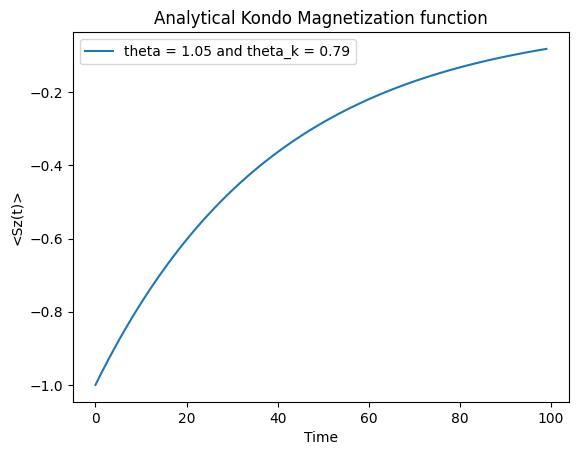

tb =  223.6254706709818


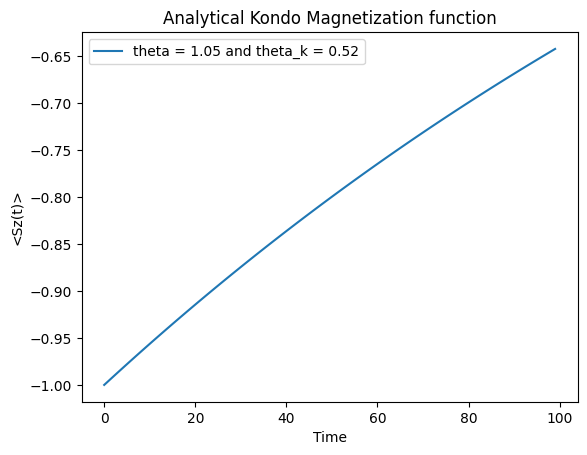

tb =  19.75399660794986


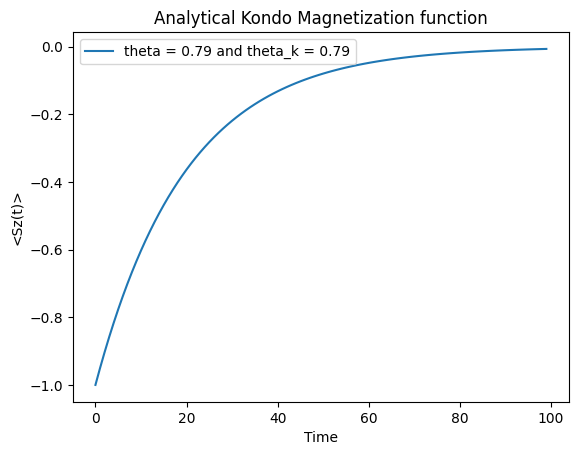

tb =  81.25313403012645


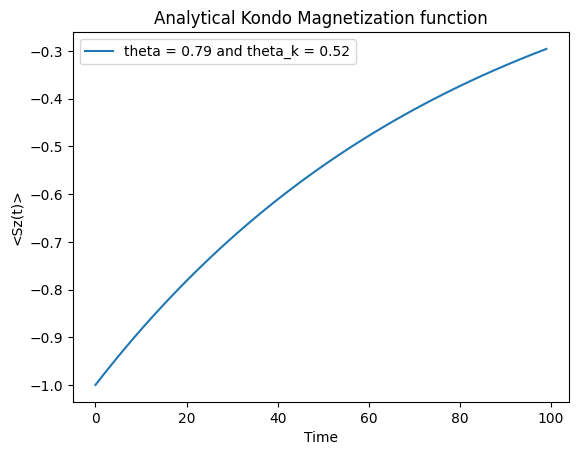

In [11]:
plot_corr0(theta_list,thetak_list)

In [12]:
from scipy.signal import find_peaks
from numpy.fft import fft, ifft

Prominent frequencies for theta_k =  0.82  are  []
Time periods for theta_k =  0.82  are  []
Prominent Peak values for theta_k =  0.82  are  []


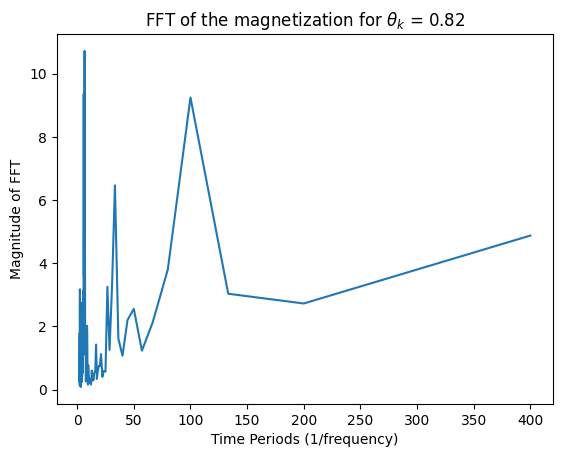

Prominent frequencies for theta_k =  0.72  are  [0.155]
Time periods for theta_k =  0.72  are  [6.4516129]
Prominent Peak values for theta_k =  0.72  are  [13.890323877896714]


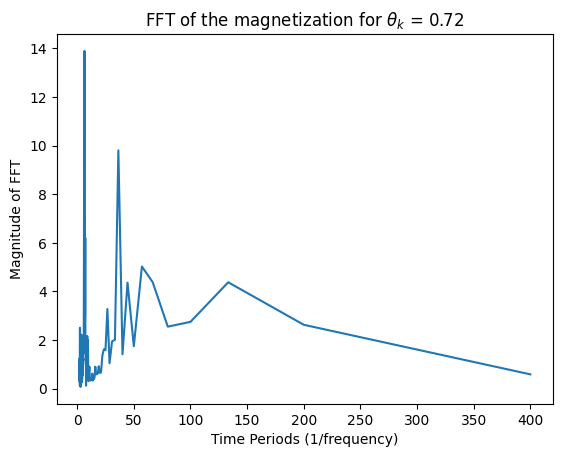

Prominent frequencies for theta_k =  0.65  are  []
Time periods for theta_k =  0.65  are  []
Prominent Peak values for theta_k =  0.65  are  []


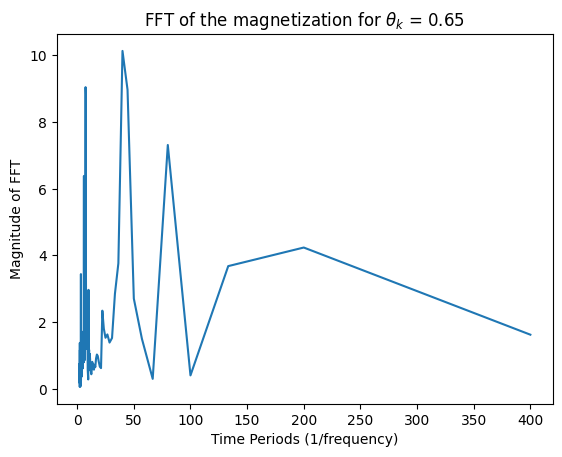

Prominent frequencies for theta_k =  0.62  are  []
Time periods for theta_k =  0.62  are  []
Prominent Peak values for theta_k =  0.62  are  []


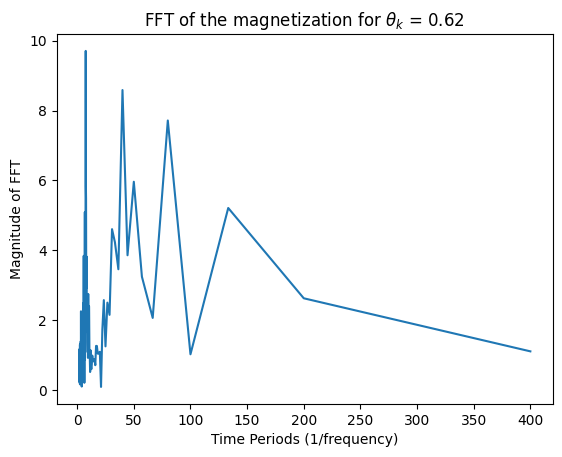

Prominent frequencies for theta_k =  0.55  are  [0.12]
Time periods for theta_k =  0.55  are  [8.33333333]
Prominent Peak values for theta_k =  0.55  are  [16.92723763062206]


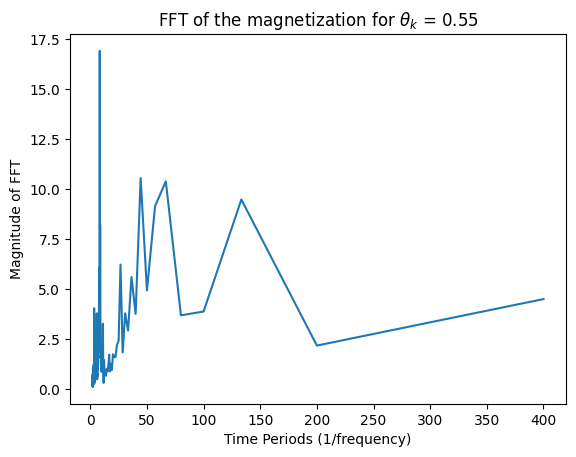

Prominent frequencies for theta_k =  0.52  are  [0.015, 0.115]
Time periods for theta_k =  0.52  are  [66.66666667  8.69565217]
Prominent Peak values for theta_k =  0.52  are  [14.106851539735416, 13.104282436577867]


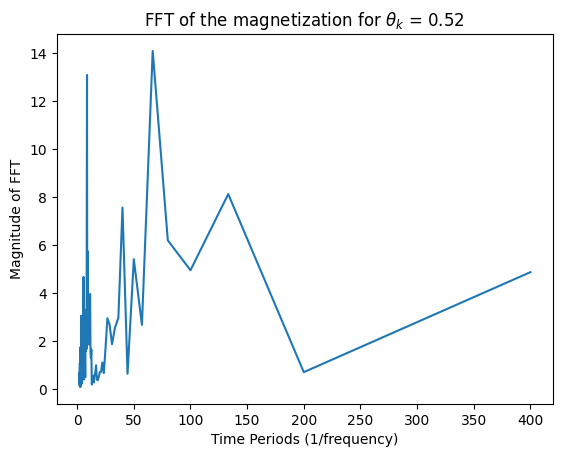

Prominent frequencies for theta_k =  0.45  are  [0.01, 0.105]
Time periods for theta_k =  0.45  are  [100.           9.52380952]
Prominent Peak values for theta_k =  0.45  are  [22.63538247071607, 16.70870542058656]


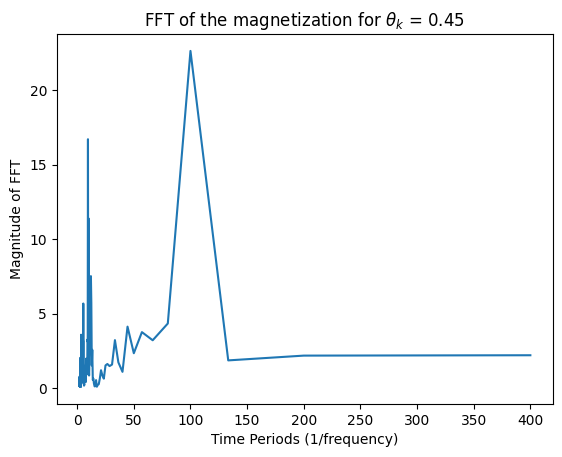

Prominent frequencies for theta_k =  0.42  are  [0.01, 0.08]
Time periods for theta_k =  0.42  are  [100.   12.5]
Prominent Peak values for theta_k =  0.42  are  [17.433211537374135, 14.657305806058536]


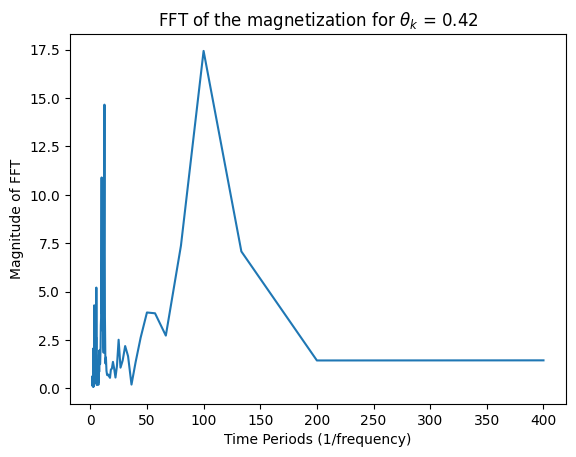

In [34]:
N = 6
theta= 1.07 #pass the true values here
theta_k_list = [0.82, 0.72, 0.65, 0.62, 0.55,0.52, 0.45, 0.42]
max_trotter_steps = 400

#i = 0

sz_vals = [0]*max_trotter_steps 
sz_vals2 = [0]*max_trotter_steps
sz_vals3 = [0]*max_trotter_steps
sz_vals4 = [0]*max_trotter_steps
sz_vals5 = [0]*max_trotter_steps

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta_k in theta_k_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals2[i] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft1 = fft(sz_vals2)
        #find list of frequencies

    freqs = np.fft.fftfreq(len(sz_vals2))
        #find the peaks
    peaks, _ = find_peaks(np.abs(fft1))
    peaks = peaks[freqs[peaks] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs = [freqs[i] for i in peaks if np.abs(fft1[i]) > 12]

    time_periods = 1/np.abs(prom_freqs)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta_k = ",theta_k," are ",prom_freqs) #print the prominent frequencies
    print("Time periods for theta_k = ",theta_k," are ",time_periods) #print the time periods

    peak_vals = [np.abs(fft1[i]) for i in peaks if np.abs(fft1[i]) > 12] #find the prominent peak values

    print("Prominent Peak values for theta_k = ",theta_k," are ",peak_vals) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos = freqs[freqs > 0]
    time_periods_1 = 1/freqs_pos
    fft1_pos = fft1[freqs > 0]

    plt.plot(time_periods_1,np.abs(fft1_pos))
    plt.xlabel("Time Periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta_k$ = " + str(theta_k))
    plt.show()



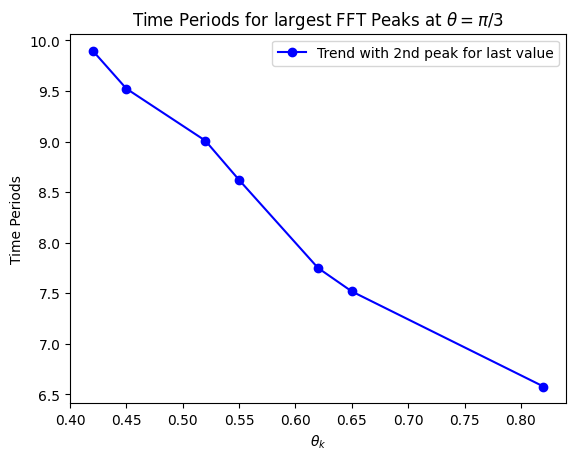

In [14]:
timeperiod_list = [100,83.333,125,62.5,111.11111111,100,111.11111111]
timeperiod_list_2 = [6.578,7.518,7.75,8.62,9.009,9.523,9.90]

#plt.plot(theta_k_list,timeperiod_list,'r',label = "Anomalous with max peaks")
plt.plot(theta_k_list,timeperiod_list_2,'bo-',label = "Trend with 2nd peak for last value")
plt.xlabel(r"$\theta_k$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta = \pi/3$")
plt.show()

Prominent frequencies for theta =  1.07  are  [0.006, 0.009000000000000001, 0.013000000000000001, 0.015, 0.017, 0.021, 0.025, 0.111, 0.114, 0.116]
Time periods for theta =  1.07  are  [166.66666667 111.11111111  76.92307692  66.66666667  58.82352941
  47.61904762  40.           9.00900901   8.77192982   8.62068966]
Prominent Peak values for theta =  1.07  are  [12.538683474288051, 12.265013906823324, 12.346529546843533, 27.012639763958738, 10.541107427479806, 17.135148652844304, 13.01849468253315, 19.747575575261106, 12.583339961824443, 18.013405941184324]


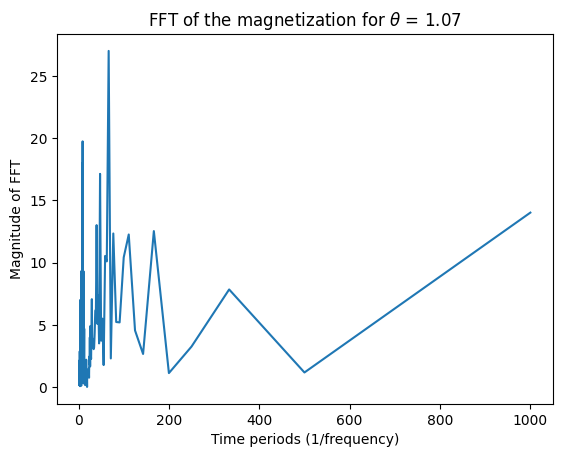

Prominent frequencies for theta =  0.97  are  [0.01, 0.015, 0.024, 0.044, 0.113]
Time periods for theta =  0.97  are  [100.          66.66666667  41.66666667  22.72727273   8.84955752]
Prominent Peak values for theta =  0.97  are  [39.4846907986692, 12.899559099095915, 31.270970135499468, 13.361076600700265, 16.634686075206126]


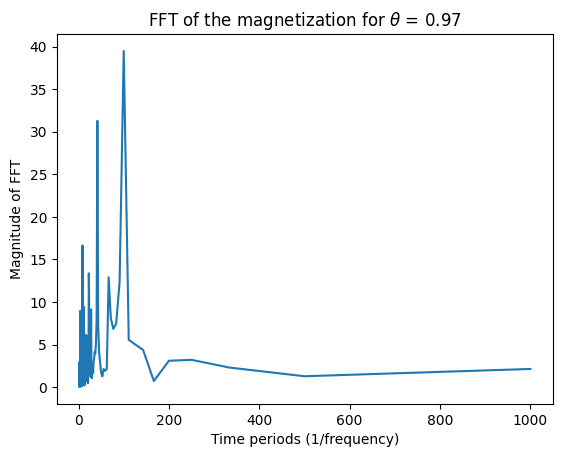

Prominent frequencies for theta =  0.87  are  [0.002, 0.004, 0.007, 0.139]
Time periods for theta =  0.87  are  [500.         250.         142.85714286   7.1942446 ]
Prominent Peak values for theta =  0.87  are  [10.530240595493156, 12.569941725239936, 15.56018576766407, 13.554870733857022]


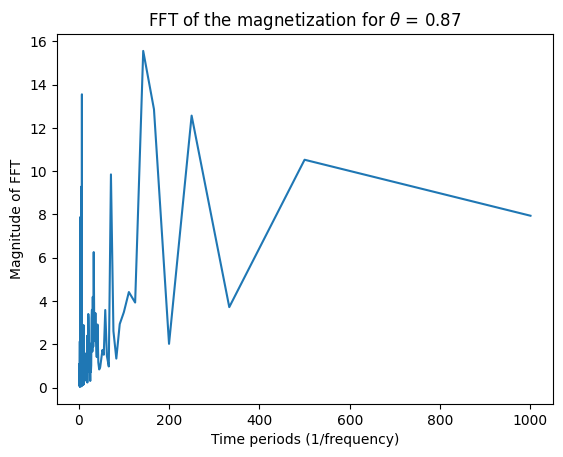

Prominent frequencies for theta =  0.77  are  [0.134]
Time periods for theta =  0.77  are  [7.46268657]
Prominent Peak values for theta =  0.77  are  [11.69466543517021]


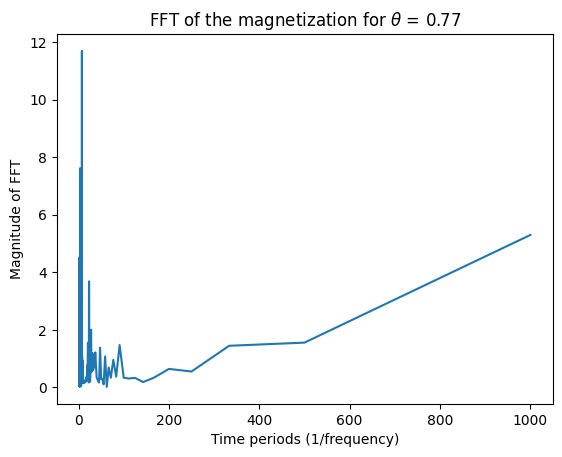

Prominent frequencies for theta =  0.67  are  [0.011, 0.123, 0.276]
Time periods for theta =  0.67  are  [90.90909091  8.1300813   3.62318841]
Prominent Peak values for theta =  0.67  are  [10.862114990386225, 23.68205617691881, 20.749655700193102]


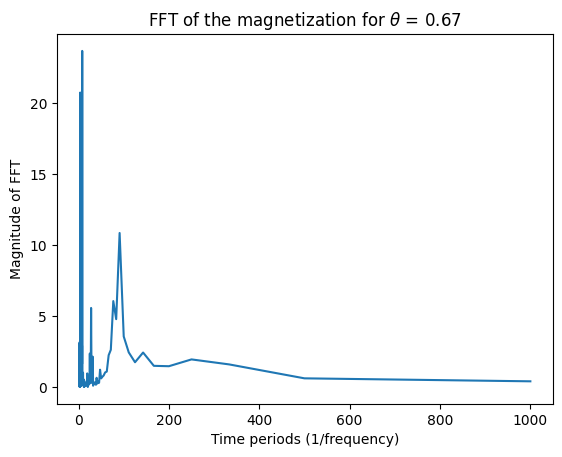

Prominent frequencies for theta =  0.57  are  [0.008, 0.107, 0.243]
Time periods for theta =  0.57  are  [125.           9.34579439   4.11522634]
Prominent Peak values for theta =  0.57  are  [12.603825695157466, 47.52049403461047, 30.524719398410394]


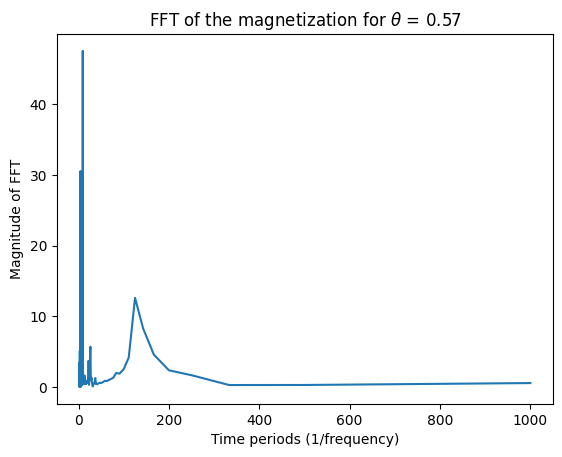

In [15]:
theta_list = [1.07,0.97, 0.87, 0.77, 0.67, 0.57]
theta_k = 0.52
max_trotter_steps = 1000

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta in theta_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals3[i] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft2 = fft(sz_vals3)
        #find list of frequencies

    freqs2 = np.fft.fftfreq(len(sz_vals3))
        #find the peaks
    peaks2, _ = find_peaks(np.abs(fft2))
    peaks2 = peaks2[freqs2[peaks2] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs2 = [freqs2[i] for i in peaks2 if np.abs(fft2[i]) > 10]

    time_periods2 = 1/np.abs(prom_freqs2)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta = ",theta," are ",prom_freqs2) #print the prominent frequencies
    print("Time periods for theta = ",theta," are ",time_periods2) #print the time periods

    peak_vals2 = [np.abs(fft2[i]) for i in peaks2 if np.abs(fft2[i]) > 10] #find the prominent peak values

    print("Prominent Peak values for theta = ",theta," are ",peak_vals2) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos2 = freqs2[freqs2 > 0]
    time_periods_2 = 1/freqs_pos2
    fft2_pos = fft2[freqs2 > 0]


        #plot the magnitudes wrt to the frequencies
    plt.plot(time_periods_2,np.abs(fft2_pos))
    plt.xlabel("Time periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta$ = " + str(theta))
    plt.show()

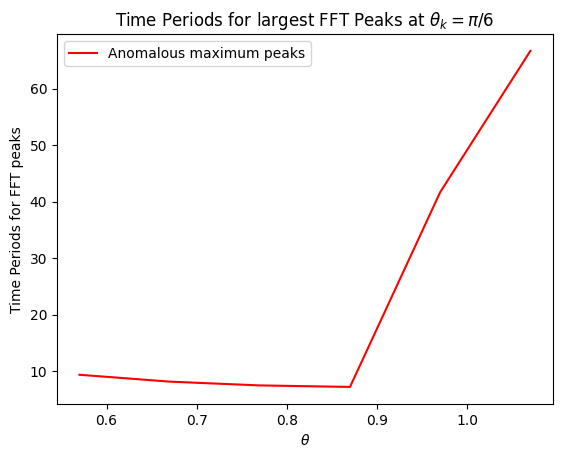

In [16]:
#timeperiod_list2 = [111.11111111,17.54385965,12.82051282,6.62251656,2.95857988,3.24675325]  #selecting the time periods from the FFT peaks
timeperiod_list2 = [66.667,41.66666667,7.1942446,7.46,8.13,9.345]

#plt.plot(theta_list,timeperiod_list2, 'bo', label = "trend with 2nd peak in the middle")
plt.plot(theta_list,timeperiod_list2, 'r', label = "Anomalous maximum peaks")
plt.xlabel(r"$\theta$")
plt.ylabel("Time Periods for FFT peaks")
plt.legend()

plt.title("Time Periods for largest FFT Peaks at " + r"$\theta_k = \pi/6$")
plt.show()

Prominent frequencies for theta_k =  0.82  are  [0.004, 0.01, 0.014]
Time periods for theta_k =  0.82  are  [250.         100.          71.42857143]
Prominent Peak values for theta_k =  0.82  are  [19.17579643890126, 17.203173379598123, 12.264747927777947]


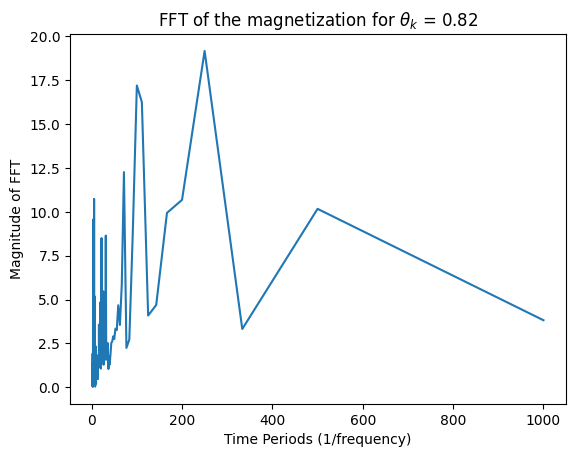

Prominent frequencies for theta_k =  0.72  are  [0.003, 0.007, 0.009000000000000001, 0.012]
Time periods for theta_k =  0.72  are  [333.33333333 142.85714286 111.11111111  83.33333333]
Prominent Peak values for theta_k =  0.72  are  [20.52001380090983, 13.090616326607917, 24.87775910562618, 15.523562065703704]


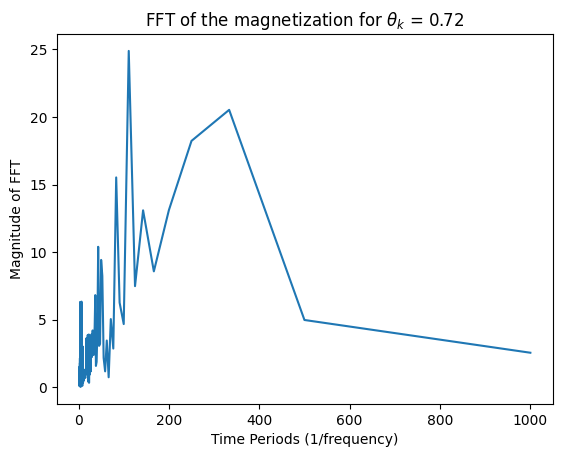

Prominent frequencies for theta_k =  0.65  are  [0.007, 0.01]
Time periods for theta_k =  0.65  are  [142.85714286 100.        ]
Prominent Peak values for theta_k =  0.65  are  [44.81360704032526, 27.849239701626757]


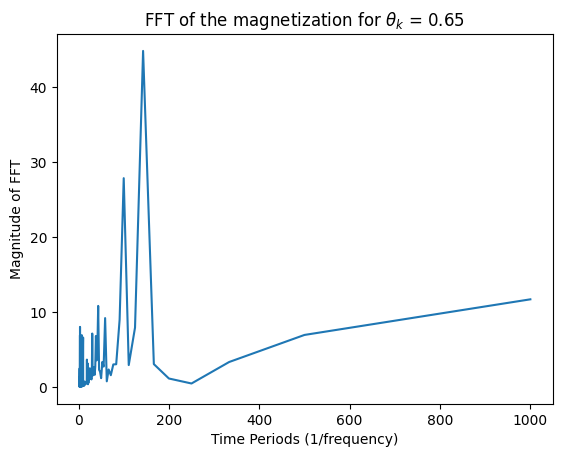

Prominent frequencies for theta_k =  0.62  are  [0.007, 0.011]
Time periods for theta_k =  0.62  are  [142.85714286  90.90909091]
Prominent Peak values for theta_k =  0.62  are  [34.91608001863095, 20.35376580734022]


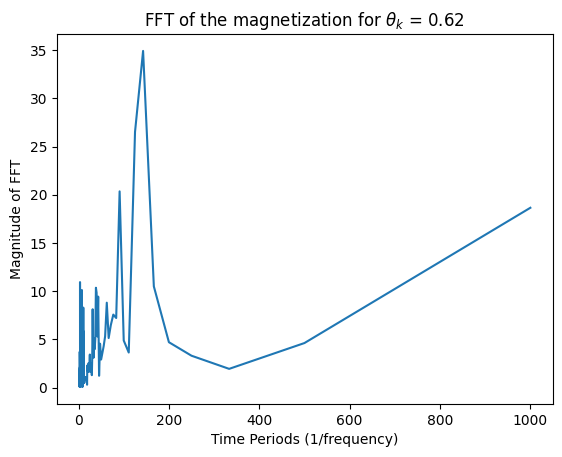

Prominent frequencies for theta_k =  0.55  are  [0.009000000000000001, 0.011, 0.122]
Time periods for theta_k =  0.55  are  [111.11111111  90.90909091   8.19672131]
Prominent Peak values for theta_k =  0.55  are  [38.55104555624152, 28.576970228292907, 13.79449399134181]


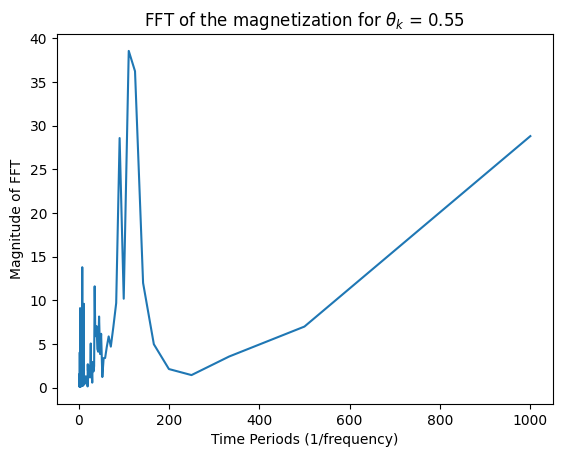

Prominent frequencies for theta_k =  0.52  are  [0.009000000000000001, 0.011, 0.027, 0.082, 0.107, 0.117]
Time periods for theta_k =  0.52  are  [111.11111111  90.90909091  37.03703704  12.19512195   9.34579439
   8.54700855]
Prominent Peak values for theta_k =  0.52  are  [46.34547173617771, 29.386792338232137, 13.482747781478341, 13.440469643966935, 12.815151741052249, 13.114118338644172]


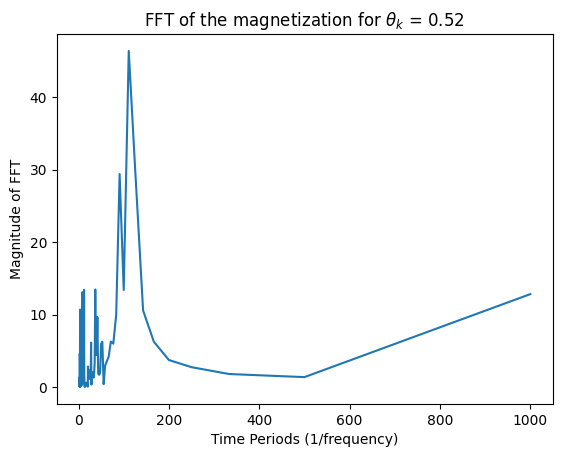

Prominent frequencies for theta_k =  0.45  are  [0.008, 0.01, 0.012, 0.07, 0.095, 0.10300000000000001]
Time periods for theta_k =  0.45  are  [125.         100.          83.33333333  14.28571429  10.52631579
   9.70873786]
Prominent Peak values for theta_k =  0.45  are  [20.215252160154744, 29.54497935182404, 16.74500809322237, 28.773516320611105, 12.730170004218088, 17.319638380859306]


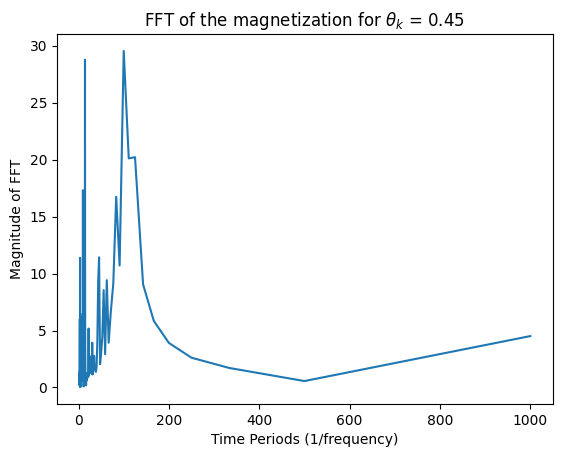

Prominent frequencies for theta_k =  0.42  are  [0.009000000000000001, 0.012, 0.021, 0.065, 0.089, 0.097]
Time periods for theta_k =  0.42  are  [111.11111111  83.33333333  47.61904762  15.38461538  11.23595506
  10.30927835]
Prominent Peak values for theta_k =  0.42  are  [47.98254512457569, 22.748393822075002, 14.026159367703155, 24.257356391526933, 18.84254040458147, 16.270308227955812]


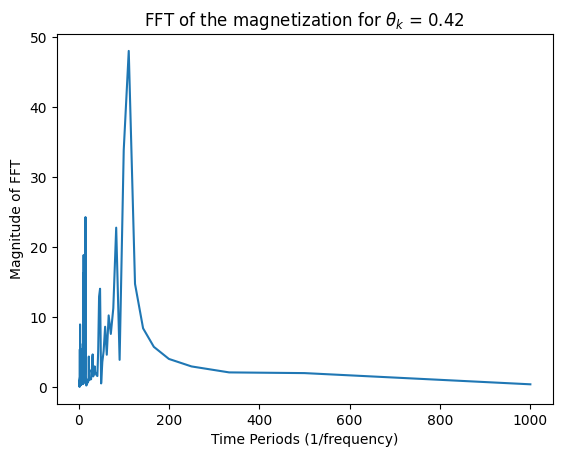

In [17]:
#Let us draw a comparision plot for analytical and numerical magnetization

N = 6
theta= 1.07 #pass the true values here
theta_k_list = [0.82, 0.72, 0.65, 0.62, 0.55,0.52, 0.45, 0.42]
max_trotter_steps = 1000

#i = 0

sz_vals = [0]*max_trotter_steps 
sz_vals2 = [0]*max_trotter_steps
sz_vals3 = [0]*max_trotter_steps
sz_vals4 = [0]*max_trotter_steps
sz_vals5 = [0]*max_trotter_steps

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta_k in theta_k_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
        sz_vals2[i-100] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft1 = fft(sz_vals2)
        #find list of frequencies

    freqs = np.fft.fftfreq(len(sz_vals2))
        #find the peaks
    peaks, _ = find_peaks(np.abs(fft1))
    peaks = peaks[freqs[peaks] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs = [freqs[i] for i in peaks if np.abs(fft1[i]) > 12]

    time_periods = 1/np.abs(prom_freqs)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta_k = ",theta_k," are ",prom_freqs) #print the prominent frequencies
    print("Time periods for theta_k = ",theta_k," are ",time_periods) #print the time periods

    peak_vals = [np.abs(fft1[i]) for i in peaks if np.abs(fft1[i]) > 12] #find the prominent peak values

    print("Prominent Peak values for theta_k = ",theta_k," are ",peak_vals) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos = freqs[freqs > 0]
    time_periods_1 = 1/freqs_pos
    fft1_pos = fft1[freqs > 0]


        #plot the magnitudes wrt to the frequencies
    plt.plot(time_periods_1,np.abs(fft1_pos))
    plt.xlabel("Time Periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta_k$ = " + str(theta_k))
    plt.show()


        
    #data2 = np.loadtxt(f"scaled_codes/data/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    #sz_vals5[i] = data2[1]     

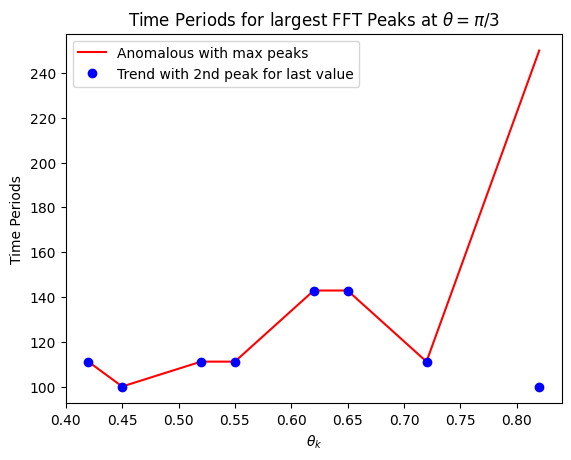

In [18]:
timeperiod_list = [250,111.11111111,142.85714286,142.85714286,111.11111111,111.11111111,100,111.11111111]
timeperiod_list_2 = [100,111.11111111,142.85714286,142.85714286,111.11111111,111.11111111,100,111.11111111]

plt.plot(theta_k_list,timeperiod_list,'r',label = "Anomalous with max peaks")
plt.plot(theta_k_list,timeperiod_list_2,'bo',label = "Trend with 2nd peak for last value")
plt.xlabel(r"$\theta_k$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta = \pi/3$")
plt.show()

Prominent frequencies for theta =  1.07  are  [0.009000000000000001, 0.011, 0.024, 0.027, 0.082, 0.107, 0.117, 0.294, 0.302]
Time periods for theta =  1.07  are  [111.11111111  90.90909091  41.66666667  37.03703704  12.19512195
   9.34579439   8.54700855   3.40136054   3.31125828]
Prominent Peak values for theta =  1.07  are  [46.34547173617771, 29.386792338232134, 9.702374798509782, 13.482747781478341, 13.440469643966935, 12.815151741052247, 13.114118338644172, 8.763237619235857, 10.708440680290357]


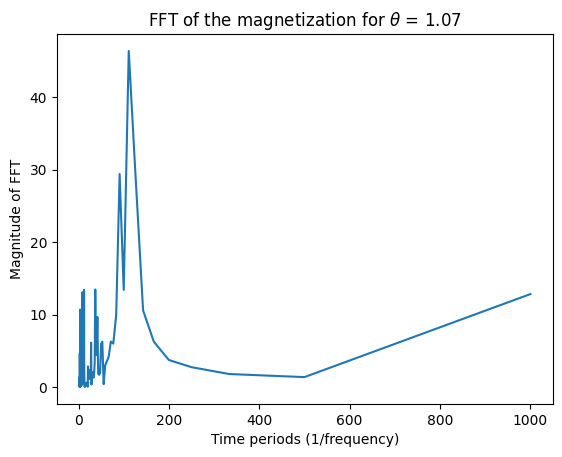

Prominent frequencies for theta =  0.97  are  [0.03, 0.032, 0.057, 0.256]
Time periods for theta =  0.97  are  [33.33333333 31.25       17.54385965  3.90625   ]
Prominent Peak values for theta =  0.97  are  [31.678891512390592, 10.495462019856642, 83.71779279217678, 16.526302812865076]


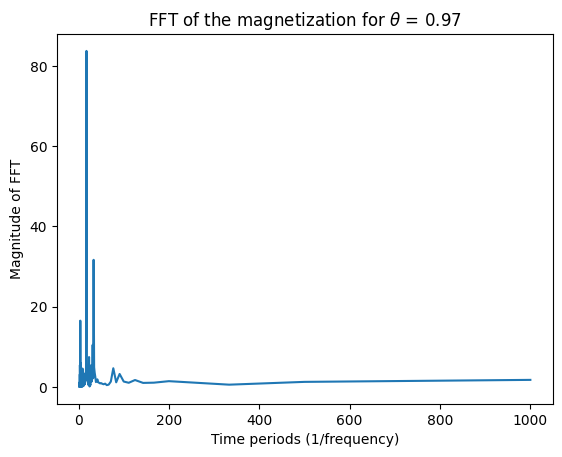

Prominent frequencies for theta =  0.87  are  [0.004, 0.038, 0.078, 0.229]
Time periods for theta =  0.87  are  [250.          26.31578947  12.82051282   4.36681223]
Prominent Peak values for theta =  0.87  are  [60.75190254588039, 12.202758534916436, 44.244304049946756, 10.400013084103831]


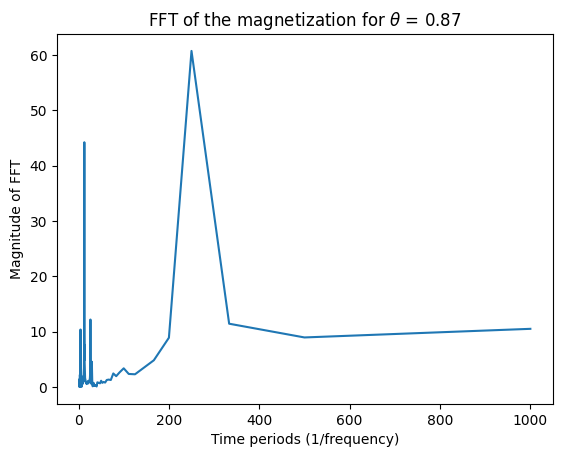

Prominent frequencies for theta =  0.77  are  [0.015, 0.151]
Time periods for theta =  0.77  are  [66.66666667  6.62251656]
Prominent Peak values for theta =  0.77  are  [9.580875891778492, 10.211940893005446]


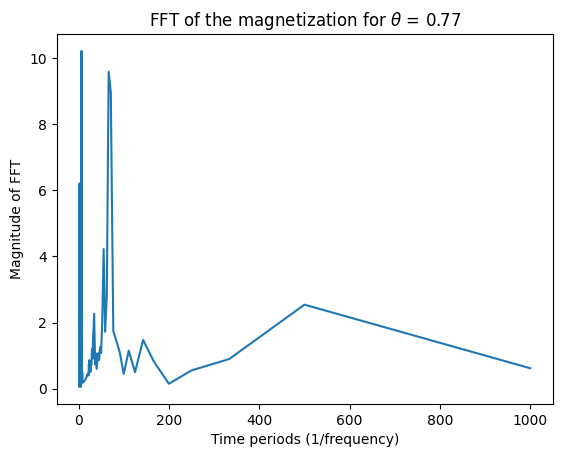

Prominent frequencies for theta =  0.67  are  [0.338]
Time periods for theta =  0.67  are  [2.95857988]
Prominent Peak values for theta =  0.67  are  [9.621795489799592]


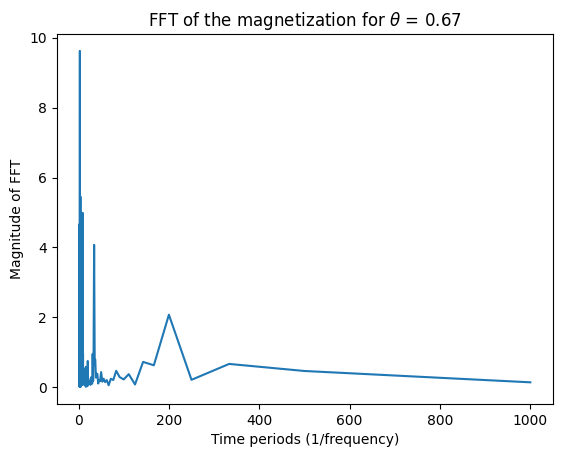

Prominent frequencies for theta =  0.57  are  [0.308]
Time periods for theta =  0.57  are  [3.24675325]
Prominent Peak values for theta =  0.57  are  [14.45697542479689]


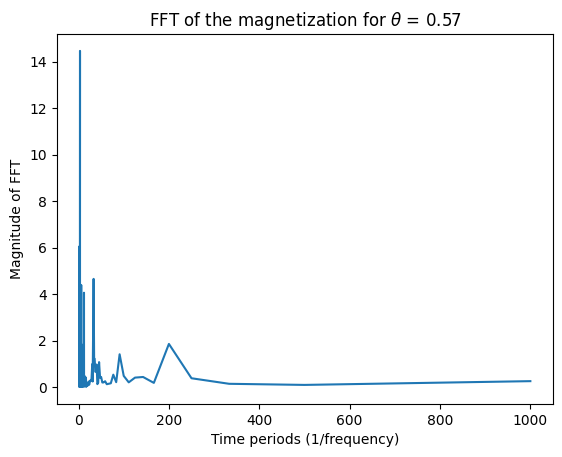

In [19]:
#We do the same, but for thetalist this time

theta_list = [1.07,0.97, 0.87, 0.77, 0.67, 0.57]
theta_k = 0.52
max_trotter_steps = 1000

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta in theta_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
        sz_vals3[i] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft2 = fft(sz_vals3)
        #find list of frequencies

    freqs2 = np.fft.fftfreq(len(sz_vals3))
        #find the peaks
    peaks2, _ = find_peaks(np.abs(fft2))
    peaks2 = peaks2[freqs2[peaks2] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs2 = [freqs2[i] for i in peaks2 if np.abs(fft2[i]) > 8]

    time_periods2 = 1/np.abs(prom_freqs2)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta = ",theta," are ",prom_freqs2) #print the prominent frequencies
    print("Time periods for theta = ",theta," are ",time_periods2) #print the time periods

    peak_vals2 = [np.abs(fft2[i]) for i in peaks2 if np.abs(fft2[i]) > 8] #find the prominent peak values

    print("Prominent Peak values for theta = ",theta," are ",peak_vals2) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos2 = freqs2[freqs2 > 0]
    time_periods_2 = 1/freqs_pos2
    fft2_pos = fft2[freqs2 > 0]


        #plot the magnitudes wrt to the frequencies
    plt.plot(time_periods_2,np.abs(fft2_pos))
    plt.xlabel("Time periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta$ = " + str(theta))
    plt.show()


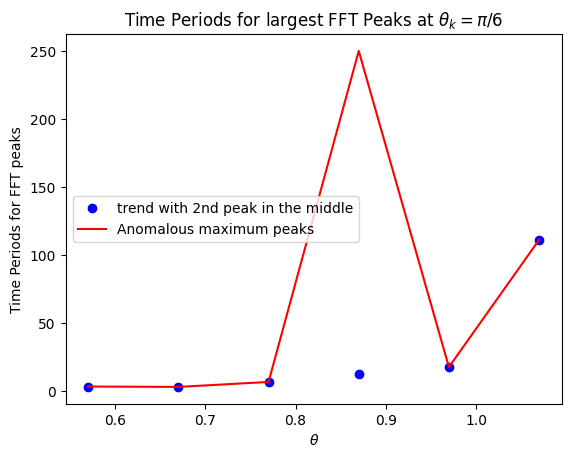

In [20]:
timeperiod_list2 = [111.11111111,17.54385965,12.82051282,6.62251656,2.95857988,3.24675325]  #selecting the time periods from the FFT peaks
timeperiod_list3 = [111.11111111,17.54385965,250,6.62251656,2.95857988,3.24675325]

plt.plot(theta_list,timeperiod_list2, 'bo', label = "trend with 2nd peak in the middle")
plt.plot(theta_list,timeperiod_list3, 'r', label = "Anomalous maximum peaks")
plt.xlabel(r"$\theta$")
plt.ylabel("Time Periods for FFT peaks")
plt.legend()

plt.title("Time Periods for largest FFT Peaks at " + r"$\theta_k = \pi/6$")
plt.show()


In [21]:
val_list = plot_corr0_2(np.pi/3,np.pi/4, n = 400)

tb =  223.6254706709818


Text(0.5, 1.0, '$t_b$ as a function of $\\theta_k$ for constant $\\theta$')

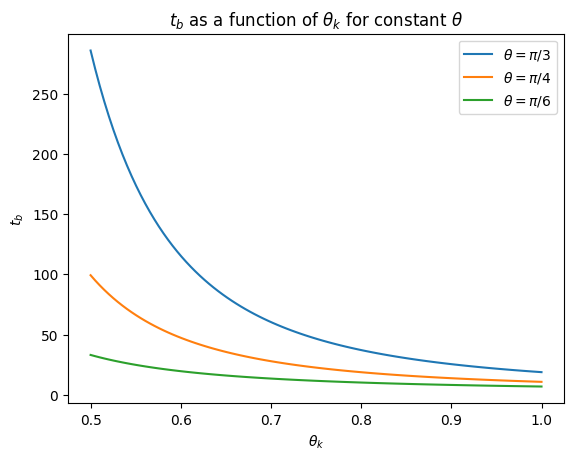

In [23]:
## Let us plot tb as a function of theta_k

theta1 = np.pi/3
theta2 = np.pi/4
theta3 = np.pi/6

theta_k_list1 = np.linspace(0.5,1,100)
theta_k_list2 = np.linspace(0.5,1,100)
theta_k_list3 = np.linspace(0.5,1,100)
tb_list1 = []
tb_list2 = []
tb_list3 = []
for theta_k in theta_k_list1:
    tb_list1.append(w*np.pi/tk_col(theta1,theta_k))

for theta_k in theta_k_list2:
    tb_list2.append(w*np.pi/tk_col(theta2,theta_k))

for theta_k in theta_k_list3:
    tb_list3.append(w*np.pi/tk_col(theta3,theta_k))

plt.plot(theta_k_list1,tb_list1, label = r"$\theta = \pi/3$")
plt.plot(theta_k_list2,tb_list2, label = r"$\theta = \pi/4$")
plt.plot(theta_k_list3,tb_list3, label = r"$\theta = \pi/6$")
plt.xlabel(r"$\theta_k$")
plt.ylabel(r"$t_b$")
plt.legend()
plt.title(r"$t_b$ as a function of $\theta_k$ for constant $\theta$")

In [24]:
import scipy.optimize as opt

In [35]:
theta_k_list = [0.82, 0.72, 0.65, 0.62, 0.55,0.52, 0.45, 0.42]

Average of the magnetization values between for theta = 1.07 and theta_k = 0.82 is  -0.37167763405791293
Numerical tb is 1.2842714789941319
Analytical tb is 36.36410709373461


C:\Users\DELL\AppData\Local\Temp\ipykernel_42252\843457712.py:31: OptimizeWarning: Covariance of the parameters could not be estimated
  optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)


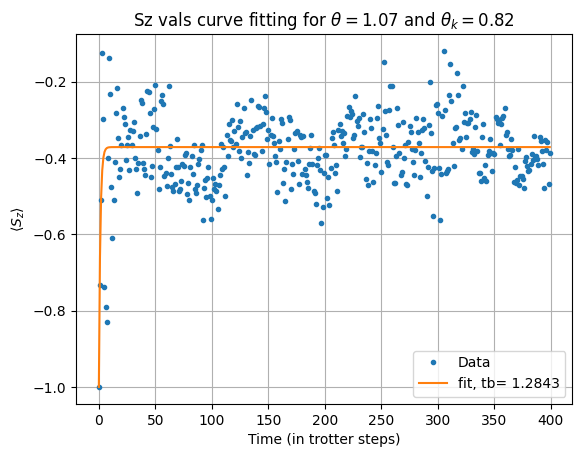

Average of the magnetization values between for theta = 1.07 and theta_k = 0.72 is  -0.3624629615459037
Numerical tb is 2.1350051944625053
Analytical tb is 57.994700752006466


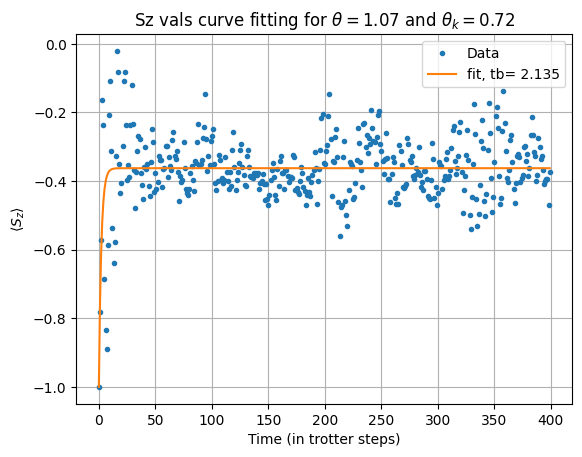

Average of the magnetization values between for theta = 1.07 and theta_k = 0.65 is  -0.32694964468573007
Numerical tb is 3.765756475442498
Analytical tb is 87.57932410340248


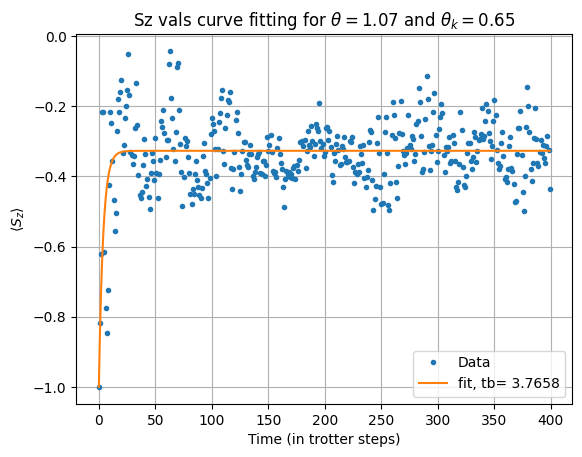

Average of the magnetization values between for theta = 1.07 and theta_k = 0.62 is  -0.3352236792135639
Numerical tb is 3.782382133548732
Analytical tb is 107.52160903329623


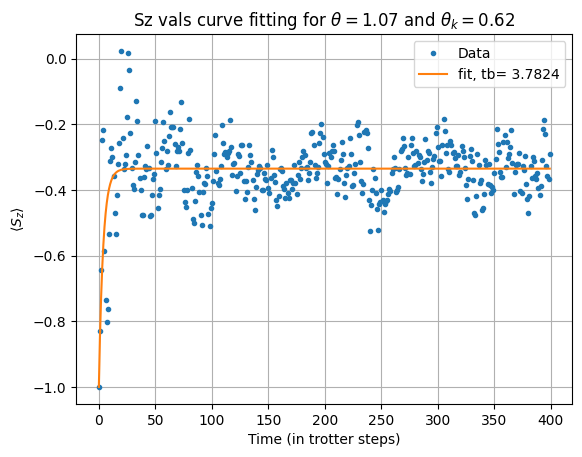

Average of the magnetization values between for theta = 1.07 and theta_k = 0.55 is  -0.3859590936242538
Numerical tb is 3.1358344903939672
Analytical tb is 189.31266372830447


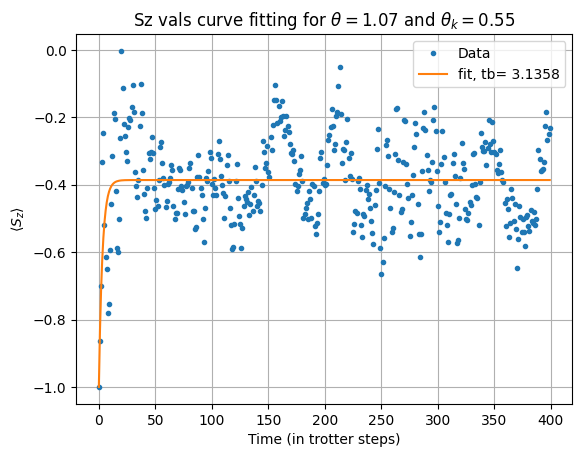

Average of the magnetization values between for theta = 1.07 and theta_k = 0.52 is  -0.41107898401764126
Numerical tb is 2.7374421210675575
Analytical tb is 252.76762345911536


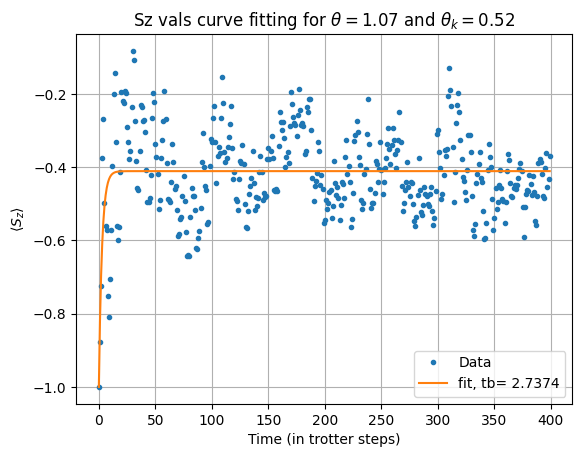

Average of the magnetization values between for theta = 1.07 and theta_k = 0.45 is  -0.4577575550628137
Numerical tb is 2.35430104841159
Analytical tb is 576.431890710391


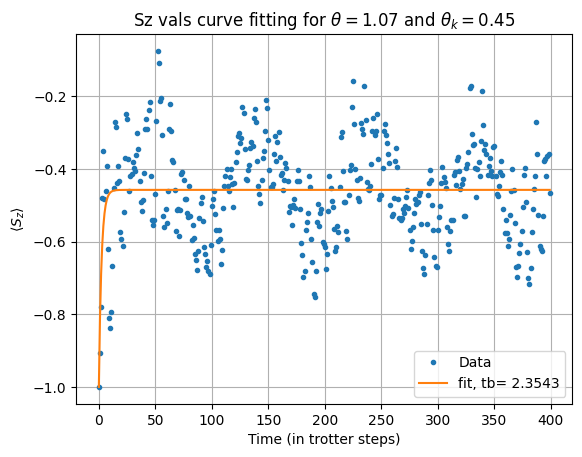

Average of the magnetization values between for theta = 1.07 and theta_k = 0.42 is  -0.4787930651000909
Numerical tb is 2.281386739337524
Analytical tb is 892.7323523632931


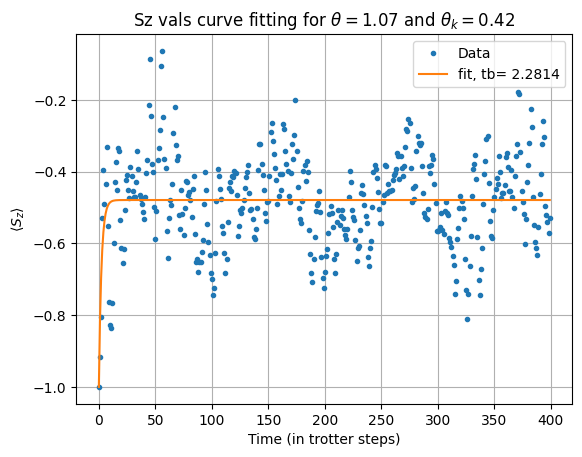

In [36]:
#Let us find the numerical decay rate of the magnetization

#Fir we have to find the average of the magnetization values from t1 to t2

t1 = 100
t2 = 400
numerical_tb_list1 = []
analytical_tb_list1 = []


theta = 1.07

for theta_k in theta_k_list:
    sz_vals = []
    

    for i in range(t2):
        data = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals.append(data[1])

    #Find the average of the magnetization values between t1 and t2

    avg = np.mean(sz_vals[t1:t2])
    print(f"Average of the magnetization values between for theta = {theta} and theta_k = {theta_k} is ",avg)
    xdata = np.array(list(range(t2)))
    ydata = np.array(sz_vals)

    def func(x, b, a , w, phi):
        return (-1-avg)*np.exp(-x/b) + avg #+ (a*np.sin(w*x + phi))

    optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)

    # Use the optimized parameters to plot the best fit
    plt.plot(xdata, ydata, ".", label="Data")
    plt.plot(xdata, func(xdata, *optimizedParameters1), label="fit, tb= {}".format(round(optimizedParameters1[0],4)))

    print("Numerical tb is",optimizedParameters1[0])
    numerical_tb_list1.append(optimizedParameters1[0])
    analytical_tb = w*np.pi/tk_col(theta,theta_k)

    print("Analytical tb is",analytical_tb)
    analytical_tb_list1.append(analytical_tb)

    # Show the graph
    plt.legend()
    plt.title("Sz vals curve fitting for " + r"$\theta = $" + f"{theta}" + " and " + r"$\theta_k = $" +  f"{theta_k}")
    plt.ylabel(r"$\langle S_z \rangle$")
    plt.xlabel(r"Time (in trotter steps)")
    #plt.ticklabel_format(axis='both', style='sci', scilimits=(-4,0))
    plt.grid()
    plt.show()



#Now, let us curve fit an exponential decay starting from -1 to the average value




In [37]:
print(numerical_tb_list1)

[1.2842714789941319, 2.1350051944625053, 3.765756475442498, 3.782382133548732, 3.1358344903939672, 2.7374421210675575, 2.35430104841159, 2.281386739337524]


Average of the magnetization values between for theta = 1.07 and theta_k = 0.52 is  -0.41107898401764126
Numerical tb is 2.7374421210675575
Analytical tb is 252.76762345911536


C:\Users\DELL\AppData\Local\Temp\ipykernel_42252\576979446.py:26: OptimizeWarning: Covariance of the parameters could not be estimated
  optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)


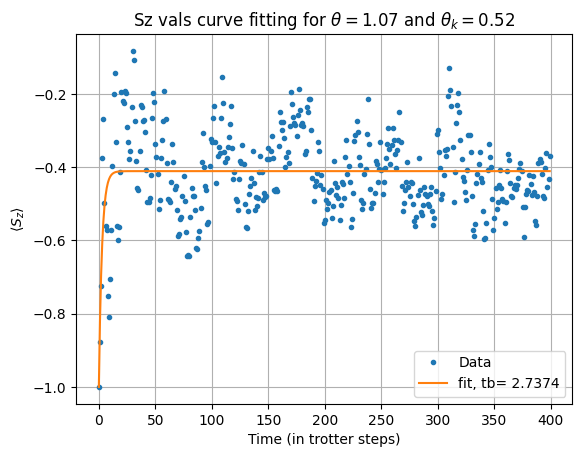

Average of the magnetization values between for theta = 0.97 and theta_k = 0.52 is  -0.4691552363124108
Numerical tb is 4.383910116928099
Analytical tb is 172.64138127662017


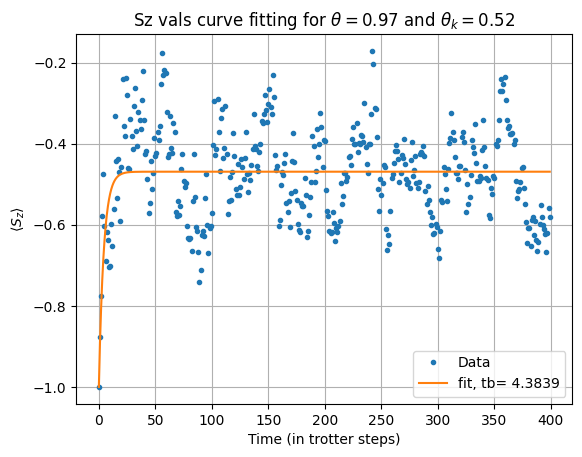

Average of the magnetization values between for theta = 0.87 and theta_k = 0.52 is  -0.5844326880294426
Numerical tb is 10.534657792729185
Analytical tb is 117.04266158341261


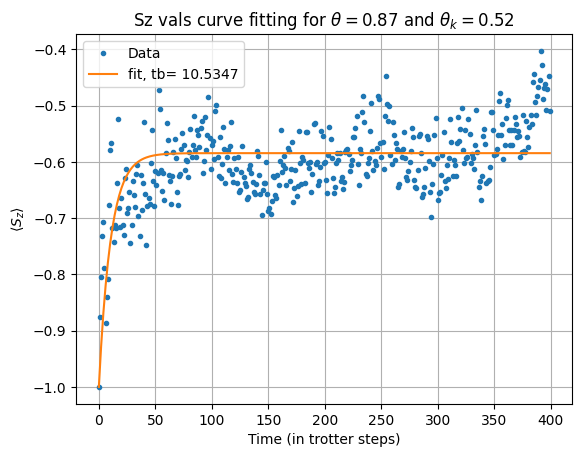

Average of the magnetization values between for theta = 0.77 and theta_k = 0.52 is  -0.8156793042719312
Numerical tb is 0.7404618797457969
Analytical tb is 78.6717019122484


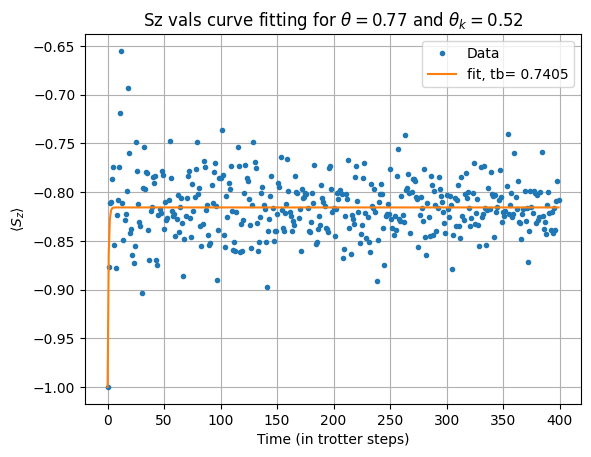

Average of the magnetization values between for theta = 0.67 and theta_k = 0.52 is  -0.7505489556096574
Numerical tb is 1.7250402016665316
Analytical tb is 52.59094255862123


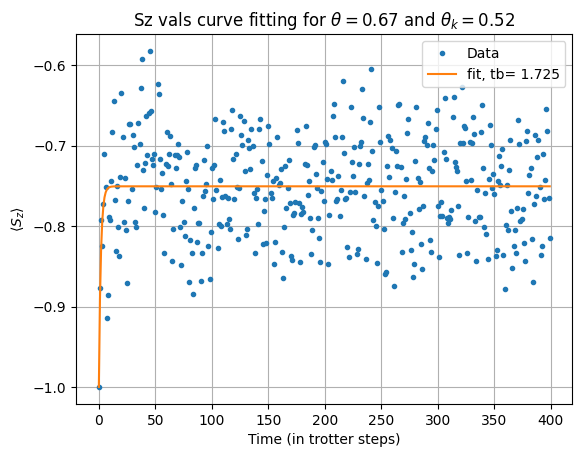

Average of the magnetization values between for theta = 0.57 and theta_k = 0.52 is  -0.7331994971538661
Numerical tb is 1.1849120757567615
Analytical tb is 35.20550951677035


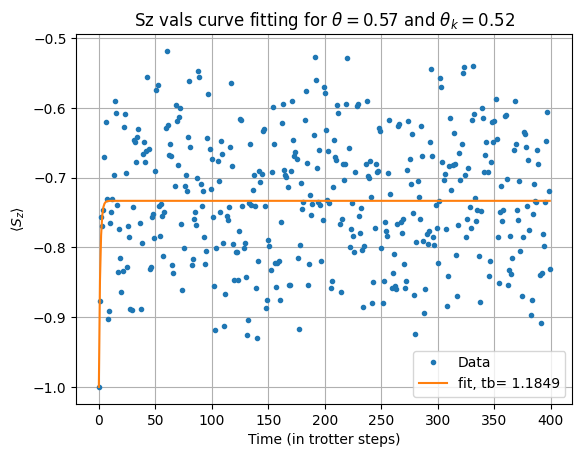

In [42]:
# Let us do the same for various theta values

theta_k = 0.52
theta_list = [1.07,0.97, 0.87, 0.77, 0.67, 0.57]
numerical_tb_list2 = []
analytical_tb_list2 = []

for theta in theta_list:
    sz_vals = []
    

    for i in range(t2):
        data = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals.append(data[1])

    #Find the average of the magnetization values between t1 and t2

    avg = np.mean(sz_vals[t1:t2])
    print(f"Average of the magnetization values between for theta = {theta} and theta_k = {theta_k} is ",avg)
    xdata = np.array(list(range(t2)))
    ydata = np.array(sz_vals)

    def func(x, b, a , w, phi):
        return (-1-avg)*np.exp(-x/b) + avg #+ (a*np.sin(w*x + phi))

    optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)

    # Use the optimized parameters to plot the best fit
    plt.plot(xdata, ydata, ".", label="Data")
    plt.plot(xdata, func(xdata, *optimizedParameters1), label="fit, tb= {}".format(round(optimizedParameters1[0],4)))

    print("Numerical tb is",optimizedParameters1[0])
    numerical_tb_list2.append(optimizedParameters1[0])
    analytical_tb = w*np.pi/tk_col(theta,theta_k)
    print("Analytical tb is",analytical_tb)
    analytical_tb_list2.append(analytical_tb)

    # Show the graph
    plt.legend()
    plt.title("Sz vals curve fitting for " + r"$\theta = $" + f"{theta}" + " and " + r"$\theta_k = $" +  f"{theta_k}")
    plt.ylabel(r"$\langle S_z \rangle$")
    plt.xlabel(r"Time (in trotter steps)")
    #plt.ticklabel_format(axis='both', style='sci', scilimits=(-4,0))
    plt.grid()
    plt.show()






In [43]:
print(numerical_tb_list2)

[2.7374421210675575, 4.383910116928099, 10.534657792729185, 0.7404618797457969, 1.7250402016665316, 1.1849120757567615]


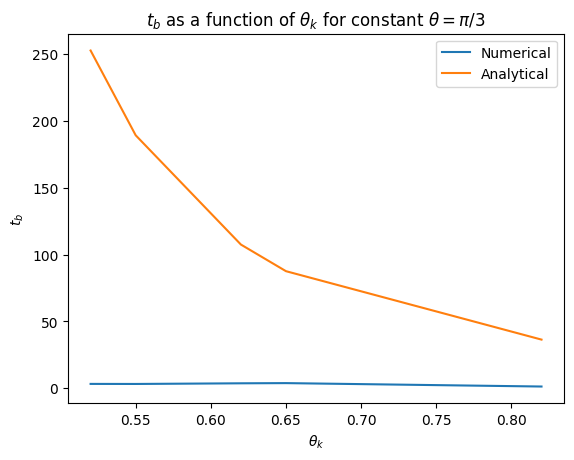

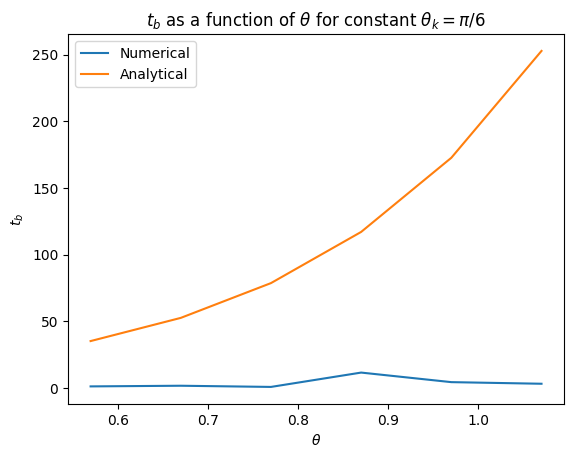

In [32]:
#Let us plot the tb values

plt.plot(theta_k_list[:-2],numerical_tb_list1[:-2], label = "Numerical")
plt.plot(theta_k_list[:-2],analytical_tb_list1[:-2], label = "Analytical")
plt.xlabel(r"$\theta_k$")
plt.ylabel(r"$t_b$")
plt.title(r"$t_b$ as a function of $\theta_k$ for constant $\theta = \pi/3$")
plt.legend()
plt.show()

plt.plot(theta_list,numerical_tb_list2, label = "Numerical")
plt.plot(theta_list,analytical_tb_list2, label = "Analytical")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$t_b$")
plt.title(r"$t_b$ as a function of $\theta$ for constant $\theta_k = \pi/6$")
plt.legend()
plt.show()

Average of the magnetization values between for theta = 1.07 and theta_k = 0.52 is  -0.41107898401764126
Variance of the magnetization values between for theta = 1.07 and theta_k = 0.52 is  0.008668985639100117
Amplitude is  0.4655614955995301


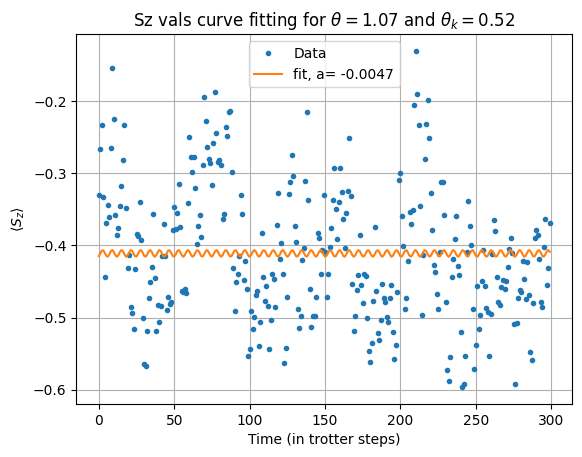

Average of the magnetization values between for theta = 0.97 and theta_k = 0.52 is  -0.4691552363124108
Variance of the magnetization values between for theta = 0.97 and theta_k = 0.52 is  0.009888938454620983
Amplitude is  0.5100305977788365


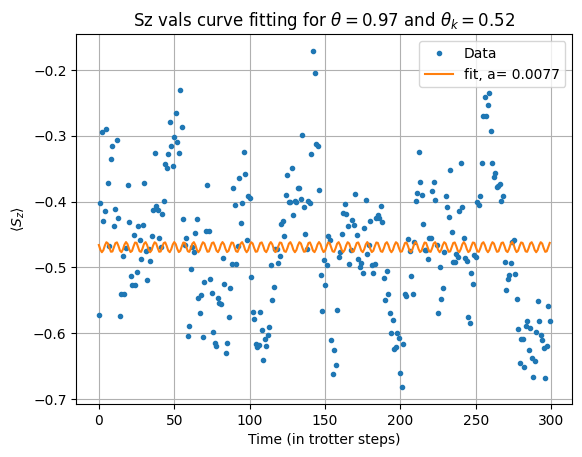

Average of the magnetization values between for theta = 0.87 and theta_k = 0.52 is  -0.5844326880294426
Variance of the magnetization values between for theta = 0.87 and theta_k = 0.52 is  0.0029092348618415596
Amplitude is  0.2958101918657982


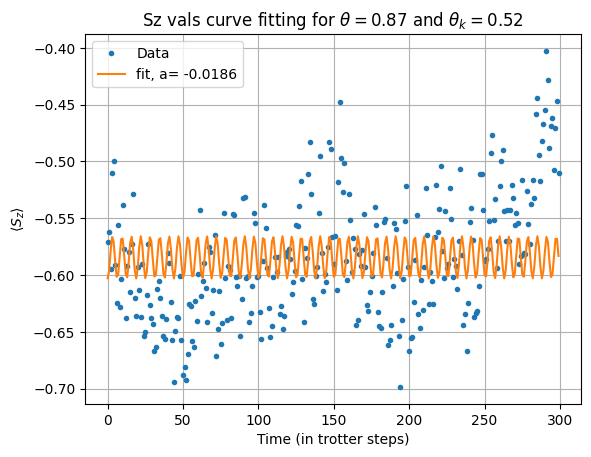

Average of the magnetization values between for theta = 0.77 and theta_k = 0.52 is  -0.8156793042719312
Variance of the magnetization values between for theta = 0.77 and theta_k = 0.52 is  0.0007019513066542142
Amplitude is  0.16194626520602284


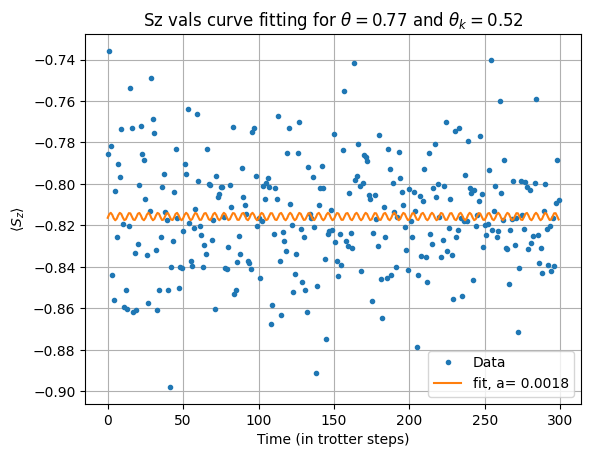

Average of the magnetization values between for theta = 0.67 and theta_k = 0.52 is  -0.7505489556096574
Variance of the magnetization values between for theta = 0.67 and theta_k = 0.52 is  0.003386883682769549
Amplitude is  0.27292407373402616


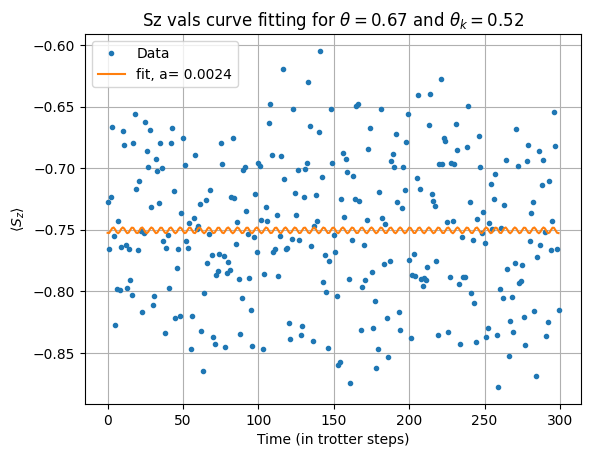

Average of the magnetization values between for theta = 0.57 and theta_k = 0.52 is  -0.7331994971538661
Variance of the magnetization values between for theta = 0.57 and theta_k = 0.52 is  0.008380975458046462
Amplitude is  0.40313114017158647


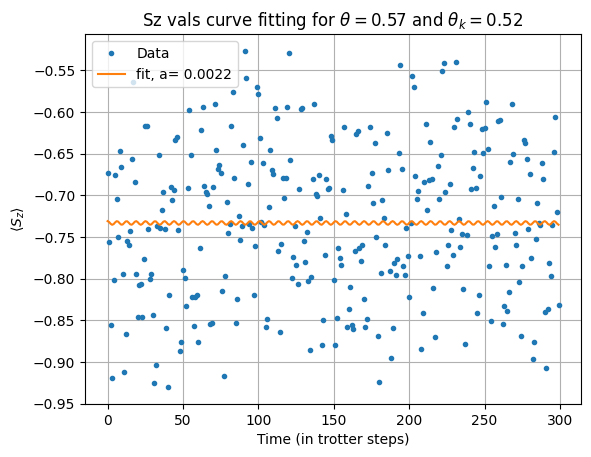

In [45]:
## Let us try curve fitting a sin function to data values between 100 and 1000

theta_k = 0.52
theta_list = [1.07,0.97, 0.87, 0.77, 0.67, 0.57]
numerical_amp_list2 = []
numerical_avg_list2 = []
numerical_var_list2 = []
#analytical_tb_list2 = []

for theta in theta_list:
    sz_vals = []
    

    for i in range(t2):
        data = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals.append(data[1])

    #Find the average of the magnetization values between t1 and t2

    avg = np.mean(sz_vals[t1:t2])
    var = np.var(sz_vals[t1:t2])
    numerical_avg_list2.append(avg)
    numerical_var_list2.append(var)
    print(f"Average of the magnetization values between for theta = {theta} and theta_k = {theta_k} is ",avg)
    print(f"Variance of the magnetization values between for theta = {theta} and theta_k = {theta_k} is ",var)
    xdata = np.array(list(range(t2-t1)))
    ydata = np.array(sz_vals[t1:t2])

    amp = np.max(ydata) - np.min(ydata)
    print("Amplitude is ",amp)
    numerical_amp_list2.append(amp)



    def func(x,a, w, phi,b):
        return  a*np.sin(w*x + phi) + b

    optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)

    # Use the optimized parameters to plot the best fit
    plt.plot(xdata, ydata, ".", label="Data")
    plt.plot(xdata, func(xdata, *optimizedParameters1), label="fit, a= {}".format(round(optimizedParameters1[0],4)))

    
    #analytical_tb = w*np.pi/tk_col(theta,theta_k)
    #print("Analytical tb is",analytical_tb)
    #analytical_tb_list2.append(analytical_tb)

    # Show the graph
    plt.legend()
    plt.title("Sz vals curve fitting for " + r"$\theta = $" + f"{theta}" + " and " + r"$\theta_k = $" +  f"{theta_k}")
    plt.ylabel(r"$\langle S_z \rangle$")
    plt.xlabel(r"Time (in trotter steps)")
    #plt.ticklabel_format(axis='both', style='sci', scilimits=(-4,0))
    plt.grid()
    plt.show()

In [46]:
print(numerical_avg_list2)

[-0.41107898401764126, -0.4691552363124108, -0.5844326880294426, -0.8156793042719312, -0.7505489556096574, -0.7331994971538661]


Average of the magnetization values between for theta = 1.07 and theta_k = 0.82 is  -0.37167763405791293
Variance of the magnetization values between for theta = 1.07 and theta_k = 0.82 is  0.005635569766557404
Amplitude is  0.4502106775187934


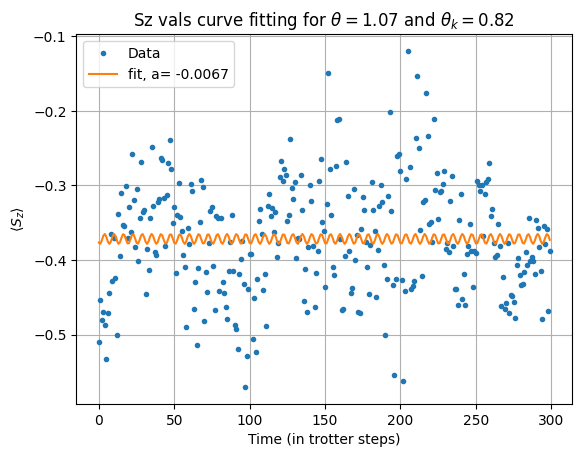

Average of the magnetization values between for theta = 1.07 and theta_k = 0.72 is  -0.3624629615459037
Variance of the magnetization values between for theta = 1.07 and theta_k = 0.72 is  0.005459223438966633
Amplitude is  0.424273527949148


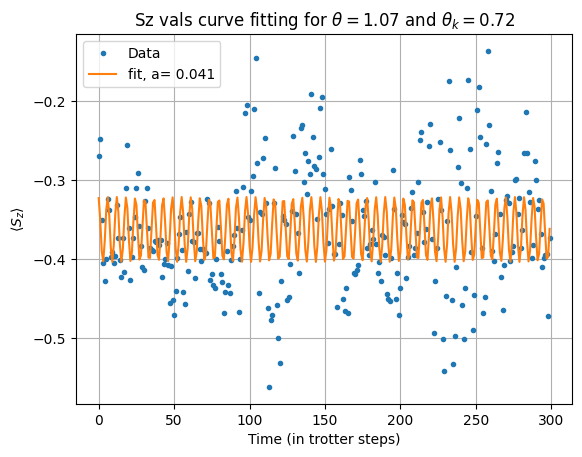

Average of the magnetization values between for theta = 1.07 and theta_k = 0.65 is  -0.32694964468573007
Variance of the magnetization values between for theta = 1.07 and theta_k = 0.65 is  0.005145173843180867
Amplitude is  0.3830991904490374


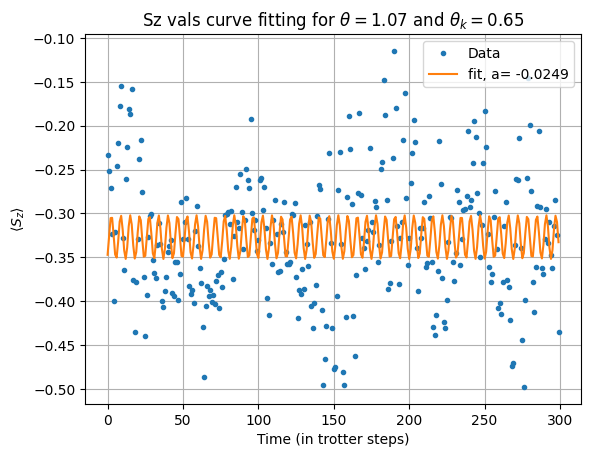

Average of the magnetization values between for theta = 1.07 and theta_k = 0.62 is  -0.3352236792135639
Variance of the magnetization values between for theta = 1.07 and theta_k = 0.62 is  0.004143586201911961
Amplitude is  0.34211000794741975


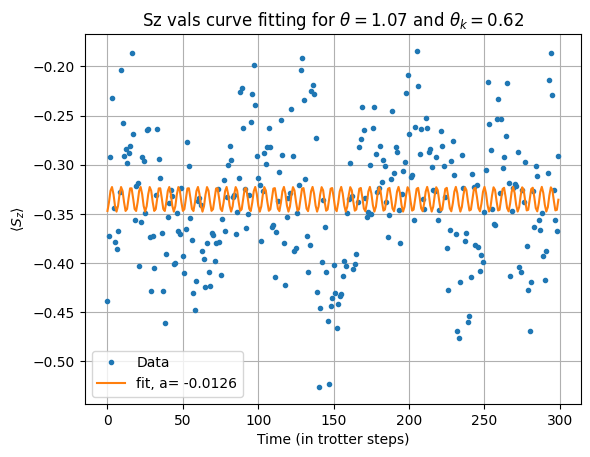

Average of the magnetization values between for theta = 1.07 and theta_k = 0.55 is  -0.3859590936242538
Variance of the magnetization values between for theta = 1.07 and theta_k = 0.55 is  0.013307946722799927
Amplitude is  0.6138751587076322


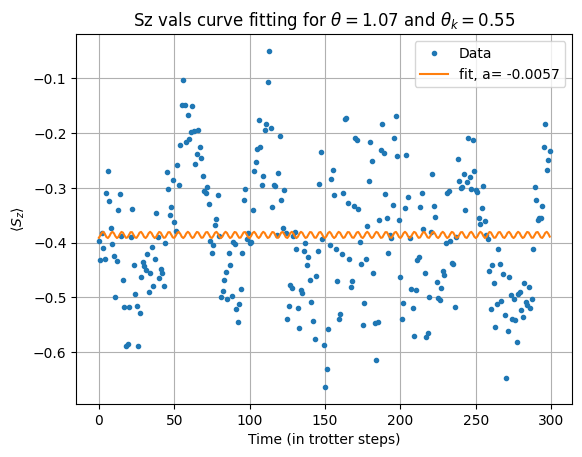

Average of the magnetization values between for theta = 1.07 and theta_k = 0.52 is  -0.41107898401764126
Variance of the magnetization values between for theta = 1.07 and theta_k = 0.52 is  0.008668985639100117
Amplitude is  0.4655614955995301


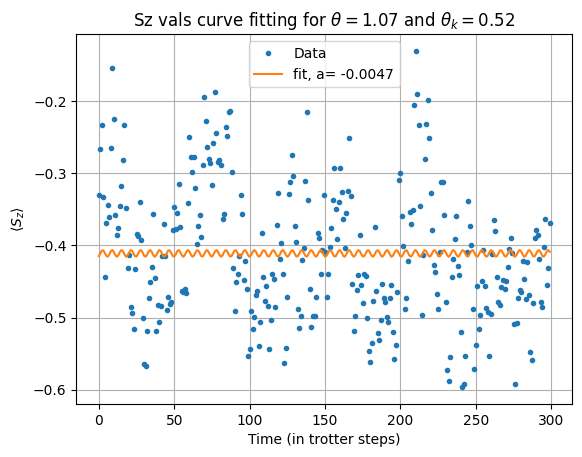

Average of the magnetization values between for theta = 1.07 and theta_k = 0.45 is  -0.4577575550628137
Variance of the magnetization values between for theta = 1.07 and theta_k = 0.45 is  0.013785774550929728
Amplitude is  0.5957478679491347


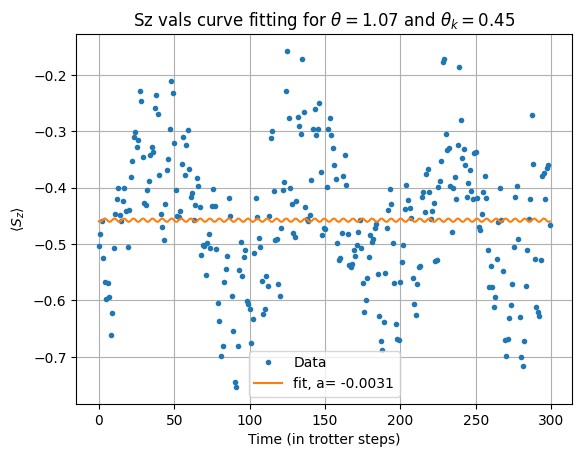

Average of the magnetization values between for theta = 1.07 and theta_k = 0.42 is  -0.4787930651000909
Variance of the magnetization values between for theta = 1.07 and theta_k = 0.42 is  0.012931369356099162
Amplitude is  0.6322598939394986


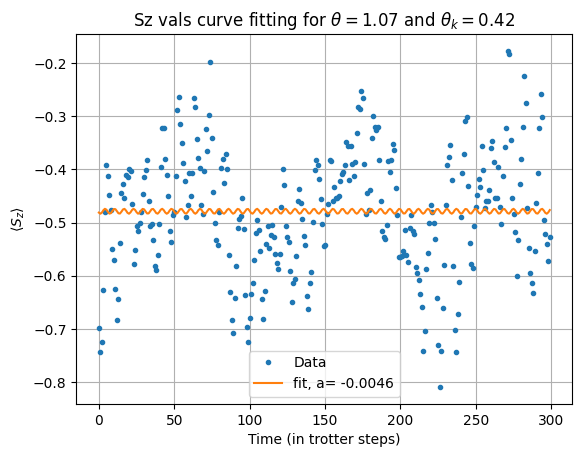

In [44]:
theta = 1.07
#theta_k_list = [1.07,0.97, 0.87, 0.77, 0.67, 0.57]
numerical_amp_list1 = []
numerical_avg_list1 = []
numerical_var_list1 = []
#analytical_tb_list2 = []

for theta_k in theta_k_list:
    sz_vals = []
    

    for i in range(t2):
        data = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals.append(data[1])

    #Find the average of the magnetization values between t1 and t2

    avg = np.mean(sz_vals[t1:t2])
    numerical_avg_list1.append(avg)
    var = np.var(sz_vals[t1:t2])
    numerical_var_list1.append(var)
    print(f"Average of the magnetization values between for theta = {theta} and theta_k = {theta_k} is ",avg)
    print(f"Variance of the magnetization values between for theta = {theta} and theta_k = {theta_k} is ",var)
    xdata = np.array(list(range(t2-t1)))
    ydata = np.array(sz_vals[t1:t2])

    amp = np.max(ydata) - np.min(ydata)
    print("Amplitude is ",amp)
    numerical_amp_list1.append(amp)



    def func(x,a, w, phi,b):
        return  a*np.sin(w*x + phi) + b

    optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)

    # Use the optimized parameters to plot the best fit
    plt.plot(xdata, ydata, ".", label="Data")
    plt.plot(xdata, func(xdata, *optimizedParameters1), label="fit, a= {}".format(round(optimizedParameters1[0],4)))

    
    #analytical_tb = w*np.pi/tk_col(theta,theta_k)
    #print("Analytical tb is",analytical_tb)
    #analytical_tb_list2.append(analytical_tb)

    # Show the graph
    plt.legend()
    plt.title("Sz vals curve fitting for " + r"$\theta = $" + f"{theta}" + " and " + r"$\theta_k = $" +  f"{theta_k}")
    plt.ylabel(r"$\langle S_z \rangle$")
    plt.xlabel(r"Time (in trotter steps)")
    #plt.ticklabel_format(axis='both', style='sci', scilimits=(-4,0))
    plt.grid()
    plt.show()

In [39]:
print(numerical_amp_list1)

[0.4502106775187934, 0.424273527949148, 0.3830991904490374, 0.34211000794741975, 0.6138751587076322, 0.4655614955995301, 0.5957478679491347, 0.6322598939394986]


In [47]:
print(numerical_amp_list2)

[0.4655614955995301, 0.5100305977788365, 0.2958101918657982, 0.16194626520602284, 0.27292407373402616, 0.40313114017158647]


In [40]:
print(numerical_avg_list1)

[-0.37167763405791293, -0.3624629615459037, -0.32694964468573007, -0.3352236792135639, -0.3859590936242538, -0.41107898401764126, -0.4577575550628137, -0.4787930651000909]


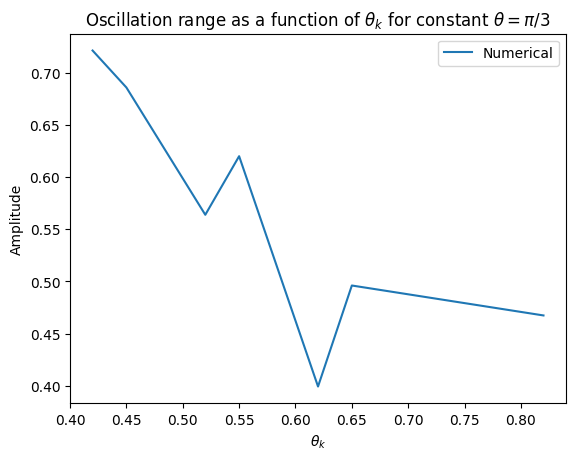

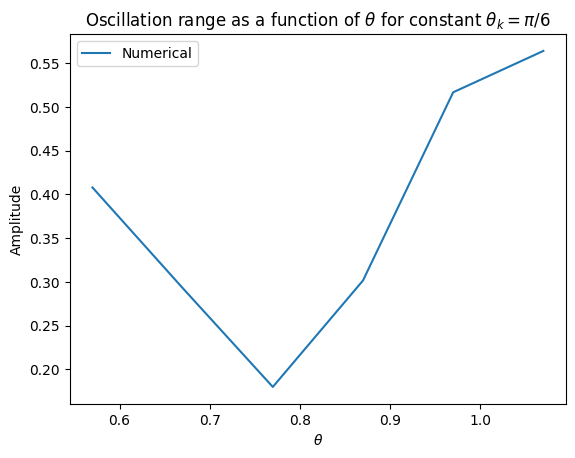

In [35]:
#Now we plot the amplitudes

plt.plot(theta_k_list,numerical_amp_list1, label = "Numerical")
plt.xlabel(r"$\theta_k$")
plt.ylabel(r"Amplitude")
plt.title(r"Oscillation range as a function of $\theta_k$ for constant $\theta = \pi/3$")
plt.legend()
plt.show()

plt.plot(theta_list,numerical_amp_list2, label = "Numerical")
plt.xlabel(r"$\theta$")
plt.ylabel(r"Amplitude")
plt.title(r"Oscillation range as a function of $\theta$ for constant $\theta_k = \pi/6$")
plt.legend()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
C:\Users\DELL\AppData\Local\Temp\ipykernel_28764\3912821886.py:3: SyntaxWarning: invalid escape sequence '\p'
  """plt.plot(theta_k_list,numerical_avg_list1, label = "Numerical")


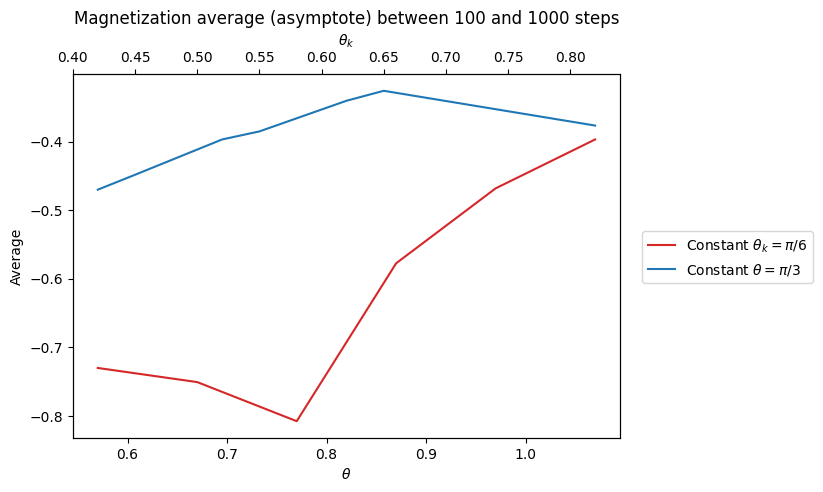

In [36]:
#Now we plot the averages

"""plt.plot(theta_k_list,numerical_avg_list1, label = "Numerical")
plt.xlabel(r"$\theta_k$")
plt.ylabel(r"Average")
plt.title(r"Average as a function of $\theta_k$ for constant $\theta = \pi/3$")
plt.legend()
plt.show()

plt.plot(theta_list,numerical_avg_list2, label = "Numerical")
plt.xlabel(r"$\theta$")
plt.ylabel(r"Average")
plt.title(r"Average as a function of $\theta$ for constant $\theta_k = \pi/6$")
plt.legend()
plt.show()"""

#Plot both averages on same axis, have different scales on top and bottom of graph

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel(r"Average")
ax1.plot(theta_list,numerical_avg_list2, color=color, label = "Constant " + r"$\theta_k = \pi/6$")
ax1.tick_params(axis='x')
#ax1.legend(loc = "lower right")

ax2 = ax1.twiny()  # instantiate a second Axes that shares the same y-axis

color = 'tab:blue'
ax2.set_xlabel(r"$\theta_k$")  # we already handled the y-label with ax1
ax2.plot(theta_k_list,numerical_avg_list1, color=color, label = "Constant " + r"$\theta = \pi/3$")
ax2.tick_params(axis='x')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Magnetization average (asymptote) between 100 and 1000 steps")
plt.show()

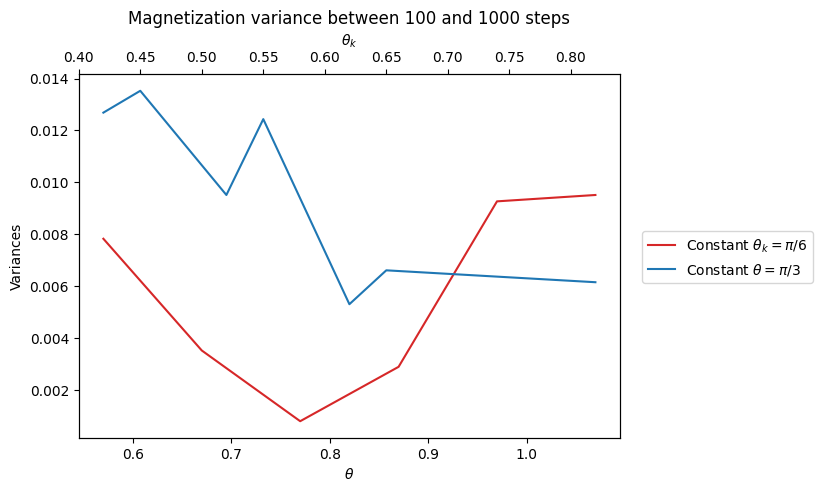

In [37]:
#Now we plot the variances

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel(r"Variances")
ax1.plot(theta_list,numerical_var_list2, color=color, label = "Constant " + r"$\theta_k = \pi/6$")
ax1.tick_params(axis='x')
#ax1.legend(loc = "lower right")

ax2 = ax1.twiny()  # instantiate a second Axes that shares the same y-axis

color = 'tab:blue'
ax2.set_xlabel(r"$\theta_k$")  # we already handled the y-label with ax1
ax2.plot(theta_k_list,numerical_var_list1, color=color, label = "Constant " + r"$\theta = \pi/3$")
ax2.tick_params(axis='x')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Magnetization variance between 100 and 1000 steps")
plt.show()


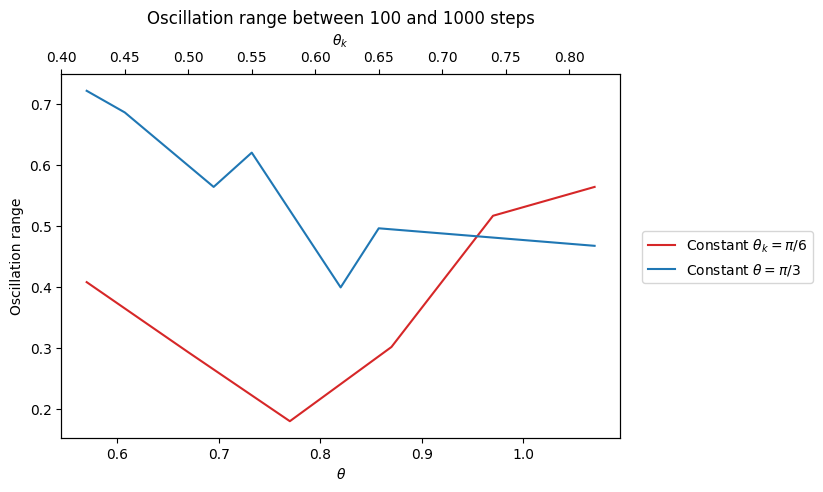

In [38]:
#Similarly plot amplitude shifts

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel(r"Oscillation range")
ax1.plot(theta_list,numerical_amp_list2, color=color, label = "Constant " + r"$\theta_k = \pi/6$")
ax1.tick_params(axis='x')
#ax1.legend(loc = "lower right")

ax2 = ax1.twiny()  # instantiate a second Axes that shares the same y-axis

color = 'tab:blue'
ax2.set_xlabel(r"$\theta_k$")  # we already handled the y-label with ax1
ax2.plot(theta_k_list,numerical_amp_list1, color=color, label = "Constant " + r"$\theta = \pi/3$")
ax2.tick_params(axis='x')

fig.tight_layout() # otherwise the right y-label is slightly clipped
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Oscillation range between 100 and 1000 steps")
plt.show()

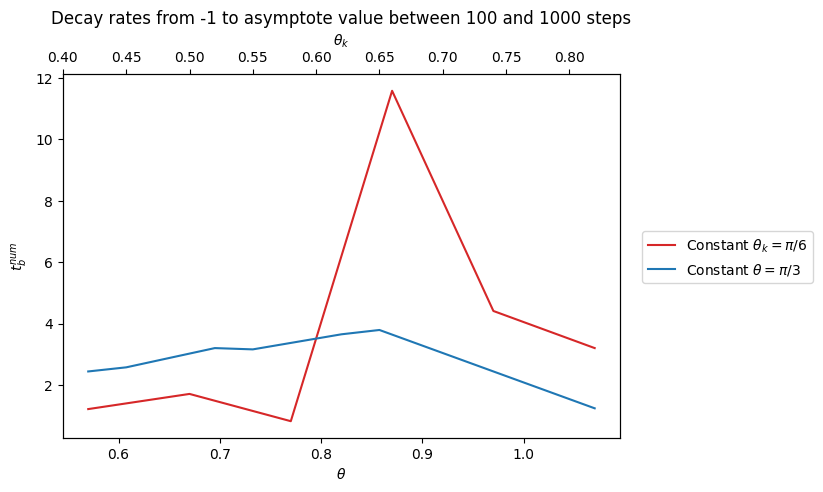

In [42]:
#Plot numerical decay rates as well

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel(r"$t_b^{num}$")
ax1.plot(theta_list,numerical_tb_list2, color=color, label = "Constant " + r"$\theta_k = \pi/6$")
ax1.tick_params(axis='x')
#ax1.legend(loc = "lower right")

ax2 = ax1.twiny()  # instantiate a second Axes that shares the same y-axis

color = 'tab:blue'
ax2.set_xlabel(r"$\theta_k$")  # we already handled the y-label with ax1
ax2.plot(theta_k_list,numerical_tb_list1, color=color, label = "Constant " + r"$\theta = \pi/3$")
ax2.tick_params(axis='x')

fig.tight_layout() # otherwise the right y-label is slightly clipped
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Decay rates from -1 to asymptote value between 100 and 1000 steps")
plt.show()

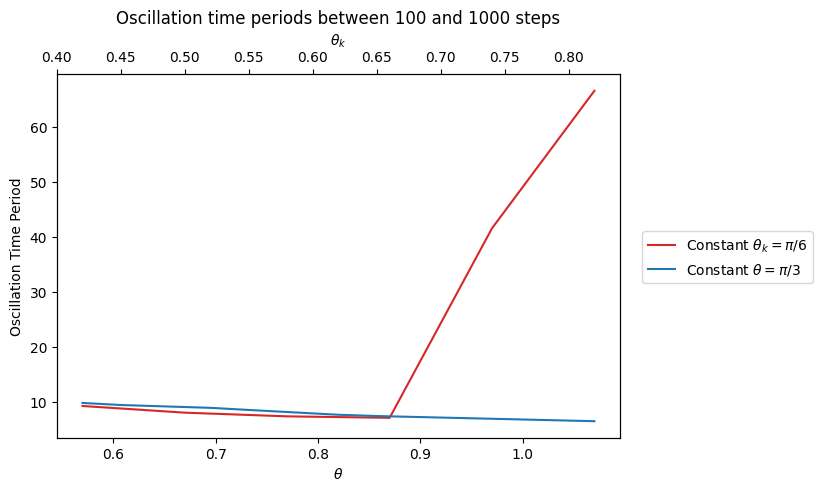

: 

In [43]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel(r"Oscillation Time Period")
ax1.plot(theta_list,timeperiod_list2, color=color, label = "Constant " + r"$\theta_k = \pi/6$")
ax1.tick_params(axis='x')
#ax1.legend(loc = "lower right")

ax2 = ax1.twiny()  # instantiate a second Axes that shares the same y-axis

color = 'tab:blue'
ax2.set_xlabel(r"$\theta_k$")  # we already handled the y-label with ax1
ax2.plot(theta_k_list,timeperiod_list_2, color=color, label = "Constant " + r"$\theta = \pi/3$")
ax2.tick_params(axis='x')

fig.tight_layout() # otherwise the right y-label is slightly clipped
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Oscillation time periods between 100 and 1000 steps")
plt.show()